# <center> **Audio Classification using Deep Learning**


# **Introduction**


## Importing the required modules


In [7]:
import IPython.display as ipd
import librosa
import librosa.display
import pandas as pd
import os, time, warnings
import seaborn as sns
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
)

warnings.filterwarnings("ignore")


2025-11-07 15:10:32.700125: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
log_cols = ["model", "accuracy", "train_time", "pred_time"]
log = pd.DataFrame(columns=log_cols)


In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chrisfilo/urbansound8k")
print("Path to dataset files:", path)

# Set the audio dataset path
audio_dataset_path = os.path.join(path, "")  # kagglehub downloads to a cache folder
if not audio_dataset_path.endswith(os.sep):
    audio_dataset_path += os.sep
    
print(f"Dataset path set to: {audio_dataset_path}")

Path to dataset files: /teamspace/studios/this_studio/.cache/kagglehub/datasets/chrisfilo/urbansound8k/versions/1
Dataset path set to: /teamspace/studios/this_studio/.cache/kagglehub/datasets/chrisfilo/urbansound8k/versions/1/


## Reading the data


In [10]:
# loading the csv
meta_data = pd.read_csv(os.path.join(audio_dataset_path, "UrbanSound8K.csv"))
meta_data["class"] = meta_data["class"].replace(
    to_replace="air_conditioner", value="Air Conditioner"
)
meta_data["class"] = meta_data["class"].replace(to_replace="car_horn", value="Car Horn")
meta_data["class"] = meta_data["class"].replace(
    to_replace="children_playing", value="Children Playing"
)
meta_data["class"] = meta_data["class"].replace(to_replace="dog_bark", value="Dog Bark")
meta_data["class"] = meta_data["class"].replace(to_replace="drilling", value="Drilling")
meta_data["class"] = meta_data["class"].replace(
    to_replace="engine_idling", value="Engine Idling"
)
meta_data["class"] = meta_data["class"].replace(to_replace="gun_shot", value="Gun Shot")
meta_data["class"] = meta_data["class"].replace(
    to_replace="jackhammer", value="Jackhammer"
)
meta_data["class"] = meta_data["class"].replace(to_replace="siren", value="Siren")
meta_data["class"] = meta_data["class"].replace(
    to_replace="street_music", value="Street Music"
)
meta_data.head()


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,Dog Bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,Children Playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,Children Playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,Children Playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,Children Playing


In [11]:
meta_data.groupby("classID")["class"].unique()


classID
0     [Air Conditioner]
1            [Car Horn]
2    [Children Playing]
3            [Dog Bark]
4            [Drilling]
5       [Engine Idling]
6            [Gun Shot]
7          [Jackhammer]
8               [Siren]
9        [Street Music]
Name: class, dtype: object

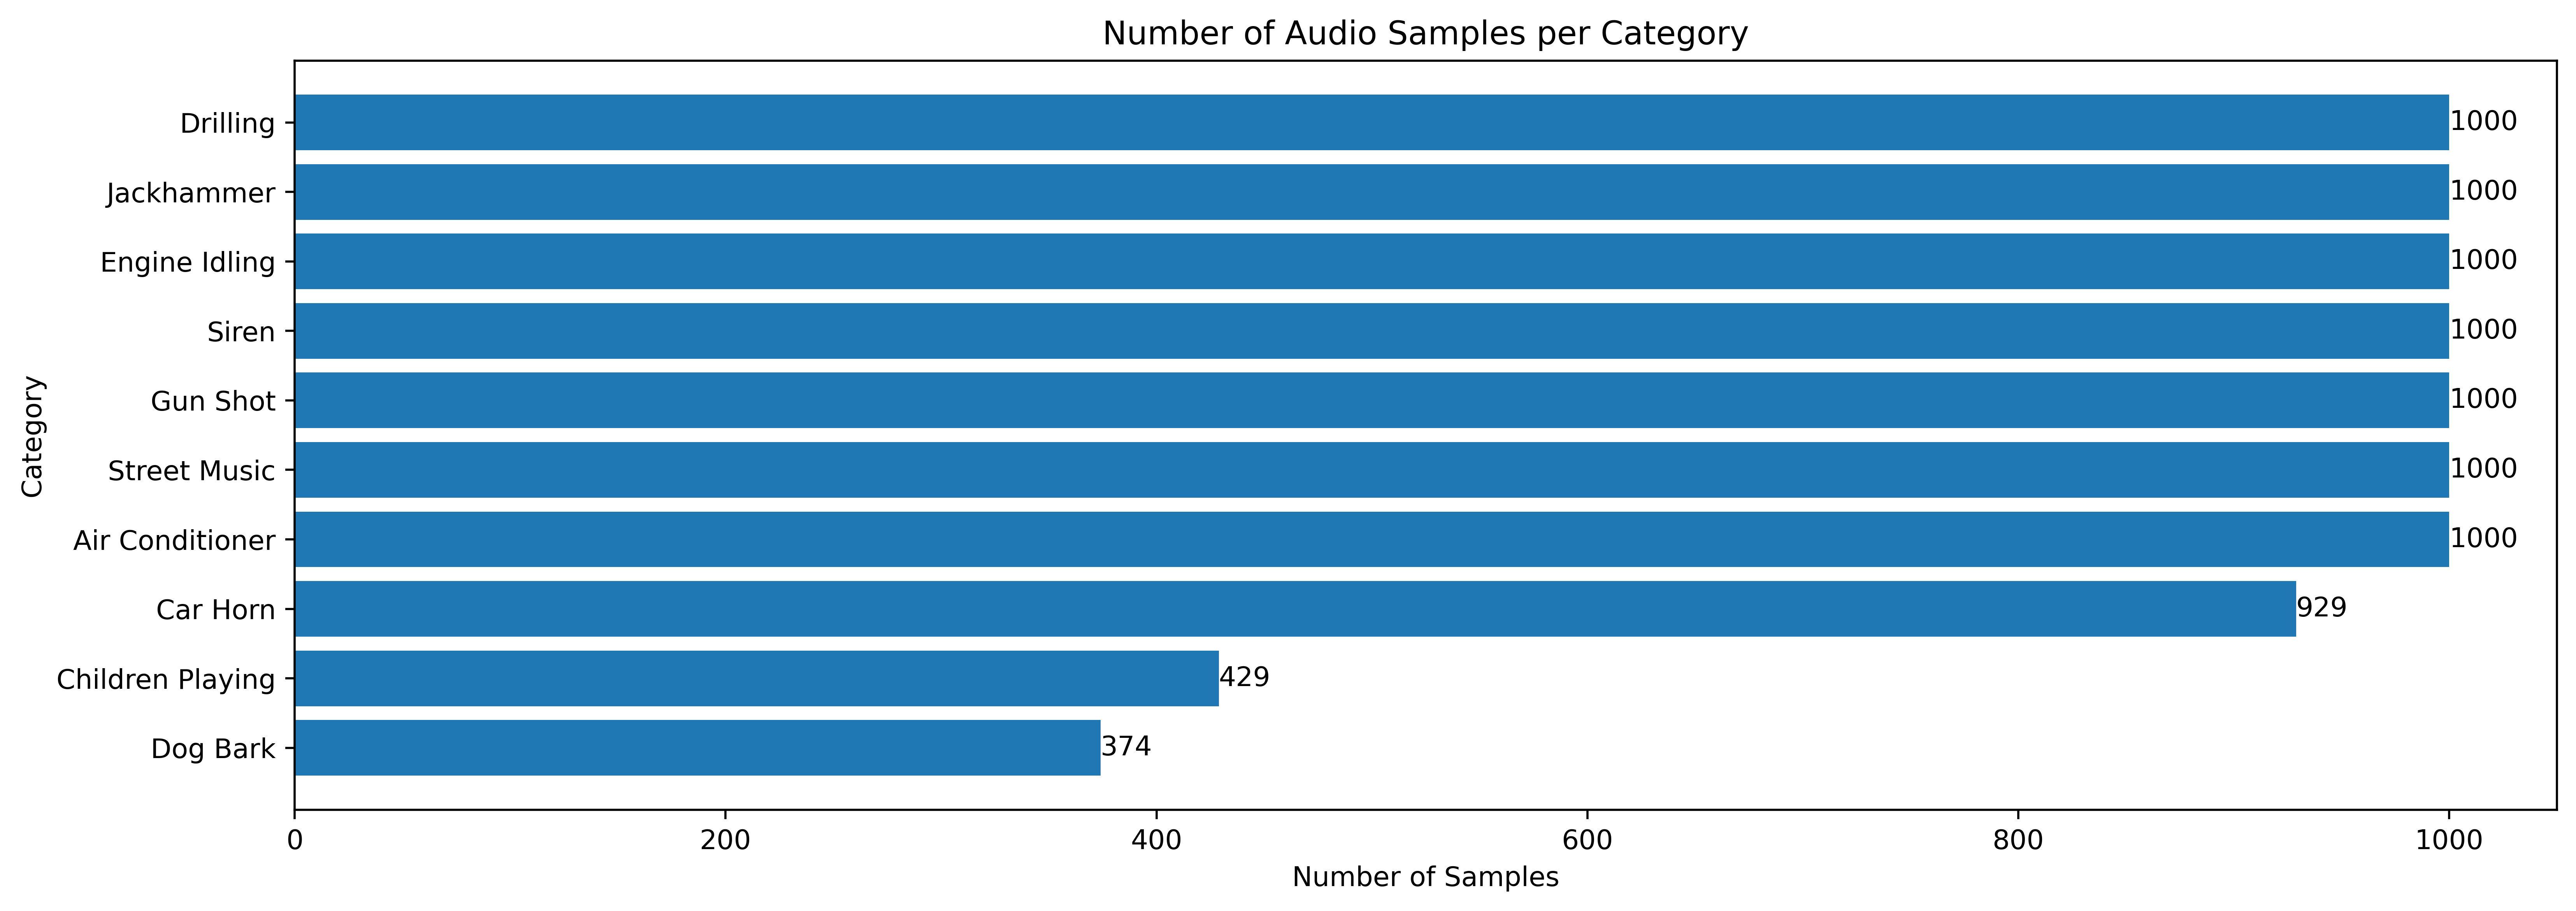

In [12]:
x = meta_data["class"].unique()
y = meta_data["class"].value_counts(ascending=True)
ind = np.arange(len(y))
# plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
ax.barh(ind, y)
ax.set_yticks(ind)
ax.set_yticklabels(x)
ax.bar_label(ax.containers[0])
plt.gcf().set_dpi(500)
plt.title("Number of Audio Samples per Category")
plt.xlabel("Number of Samples")
plt.ylabel("Category")
plt.show()


# **MFCC Visualization**


In [13]:
plt.rcParams["figure.figsize"] = (4, 5)
plt.rcParams["figure.dpi"] = 200


<function matplotlib.pyplot.show(close=None, block=None)>

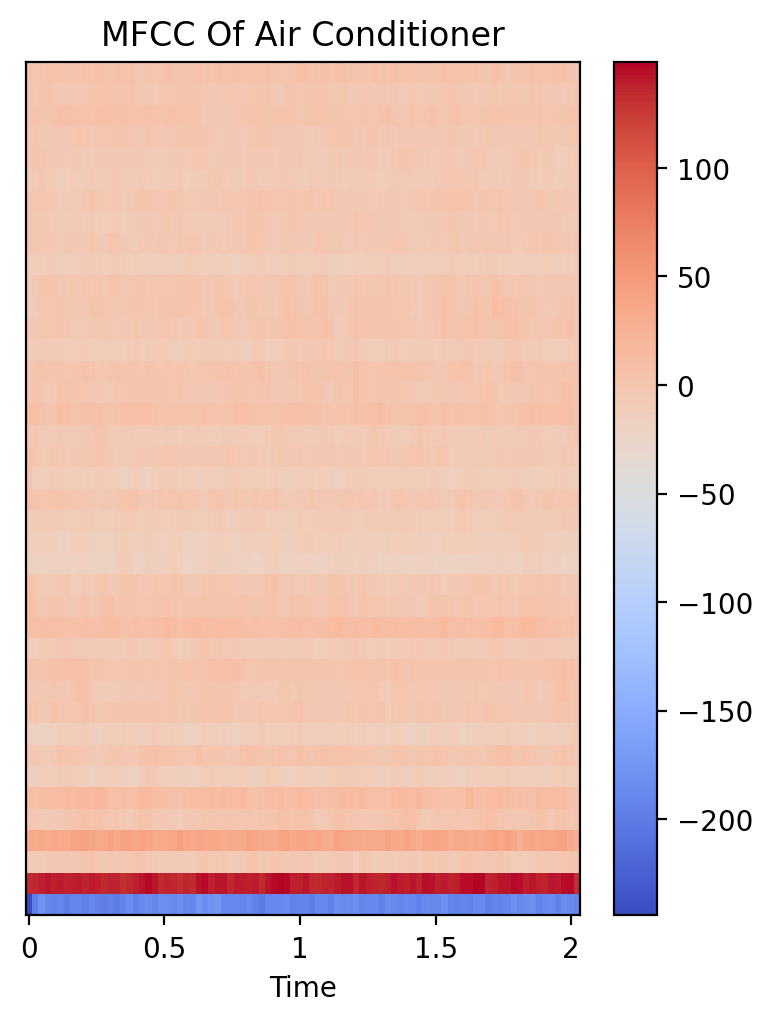

In [14]:
audio_path = audio_dataset_path + "fold1/127873-0-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Air Conditioner")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

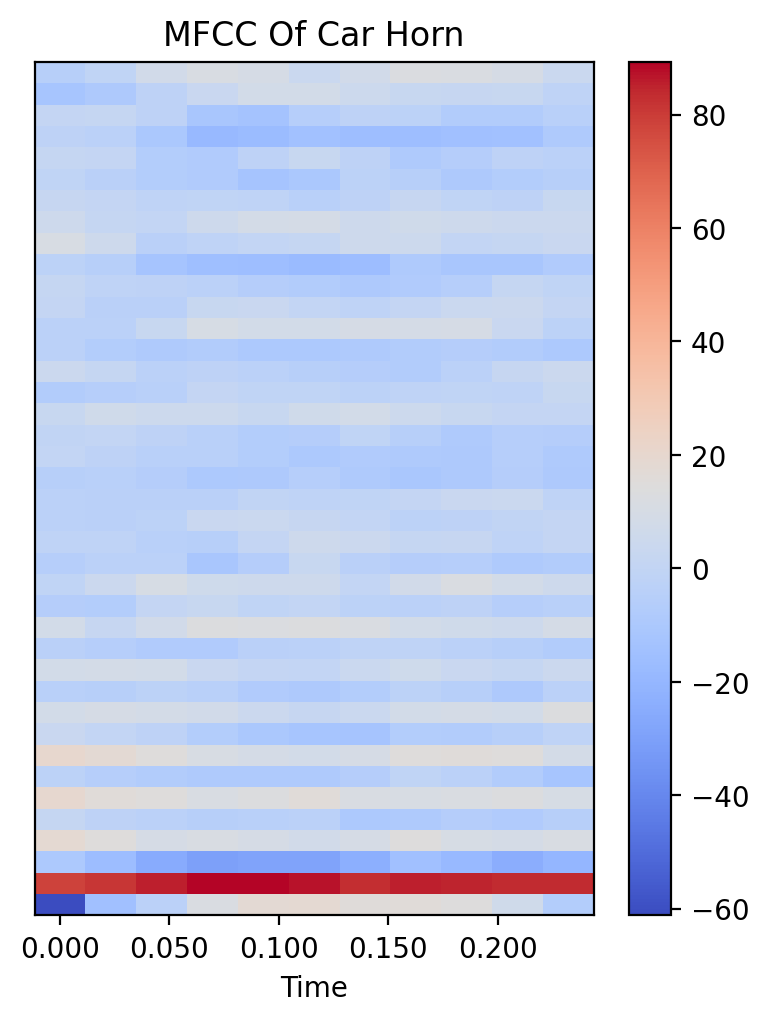

In [15]:
audio_path = audio_dataset_path + "fold1/156194-1-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Car Horn")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

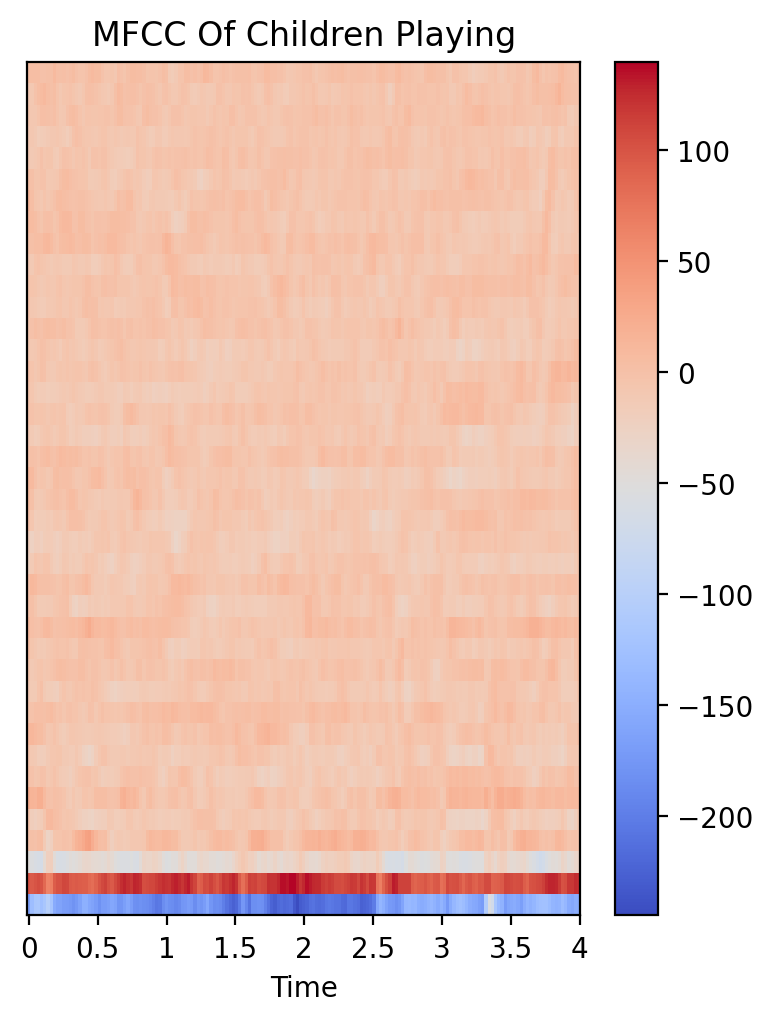

In [16]:
audio_path = audio_dataset_path + "fold1/105415-2-0-1.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Children Playing")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

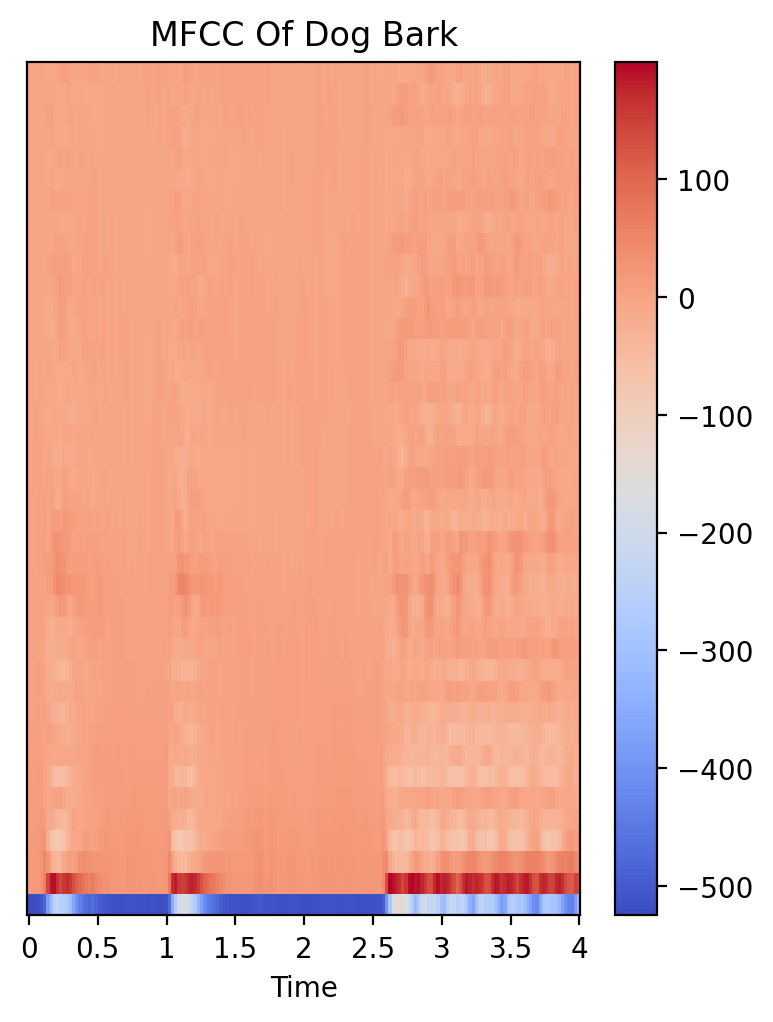

In [17]:
audio_path = audio_dataset_path + "fold1/101415-3-0-2.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Dog Bark")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

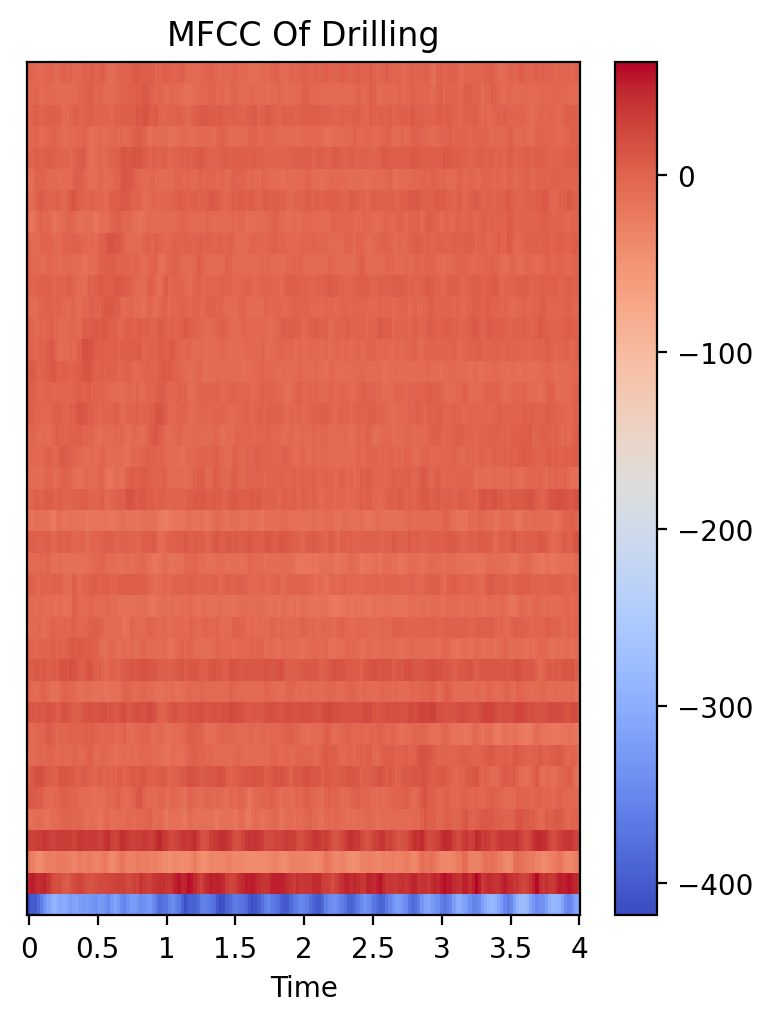

In [18]:
audio_path = audio_dataset_path + "fold1/14113-4-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Drilling")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

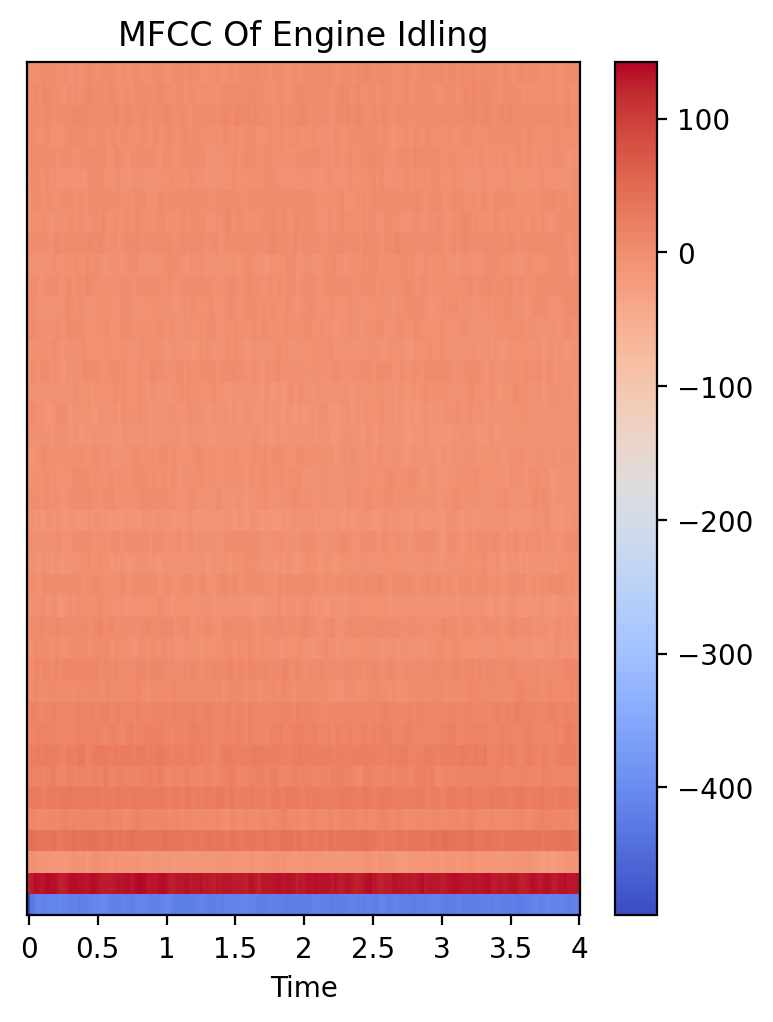

In [19]:
audio_path = audio_dataset_path + "fold1/103258-5-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Engine Idling")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

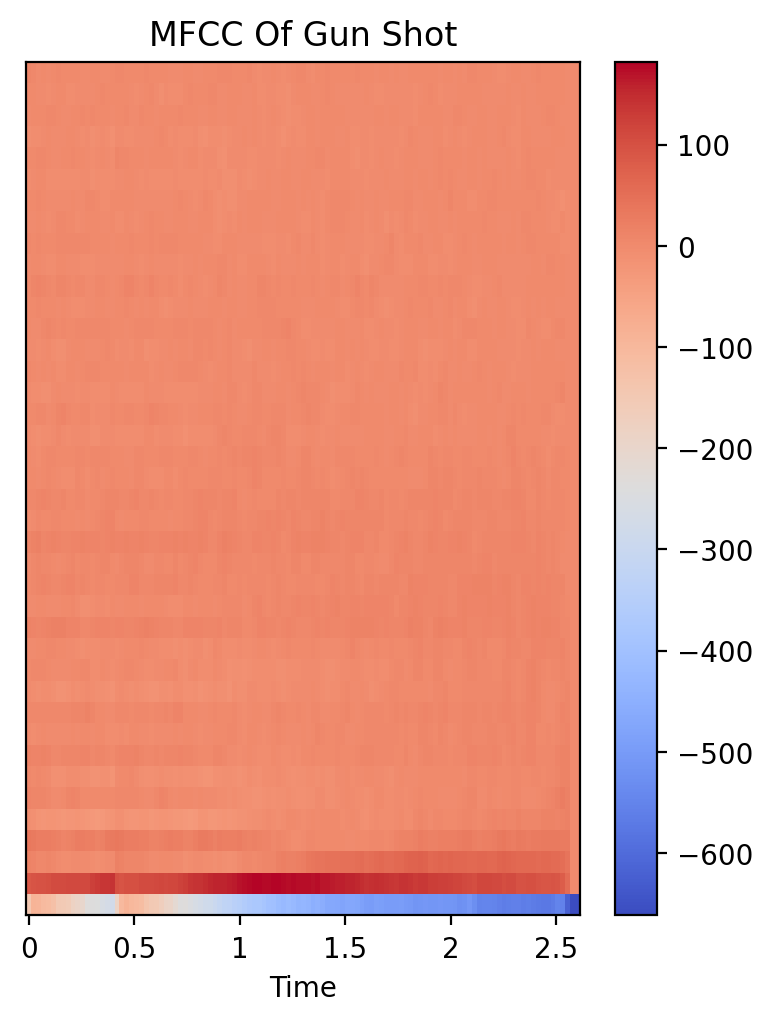

In [20]:
audio_path = audio_dataset_path + "fold1/102305-6-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Gun Shot")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

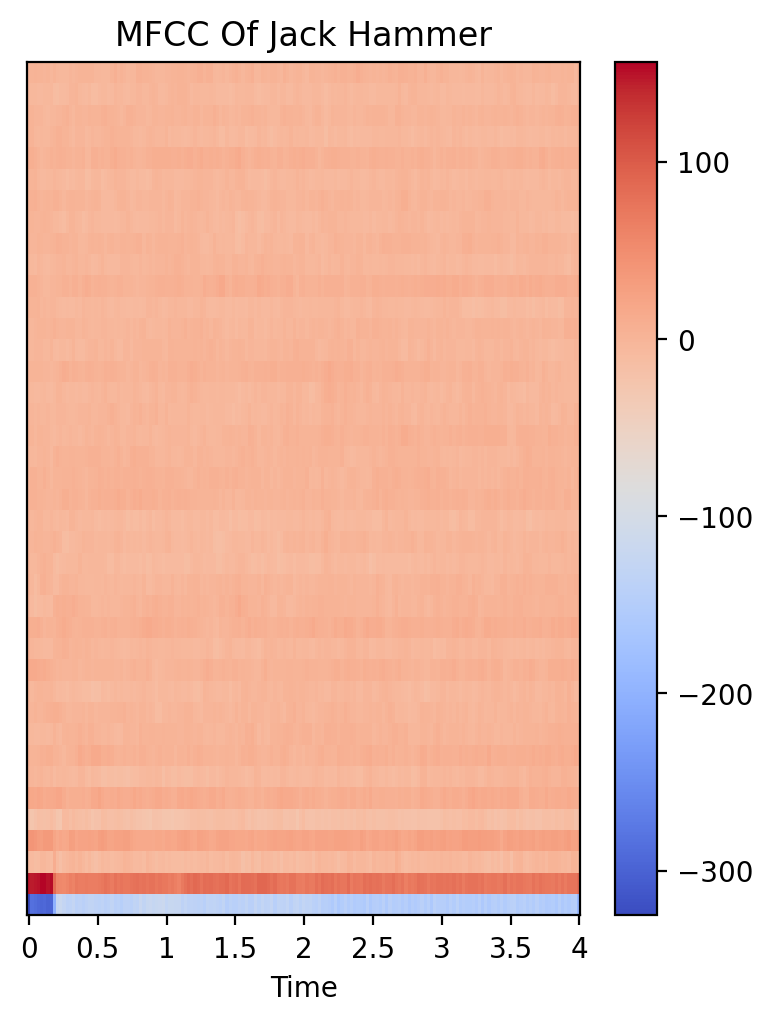

In [21]:
audio_path = audio_dataset_path + "fold1/103074-7-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Jack Hammer")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

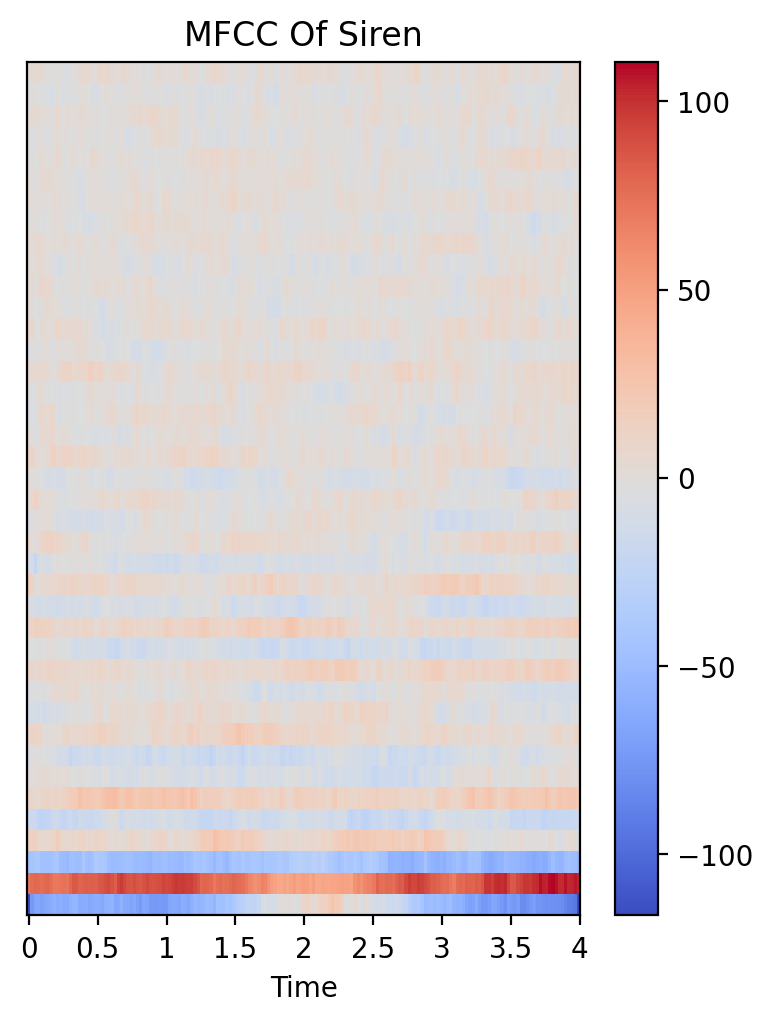

In [22]:
audio_path = audio_dataset_path + "fold1/106905-8-0-0.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Siren")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

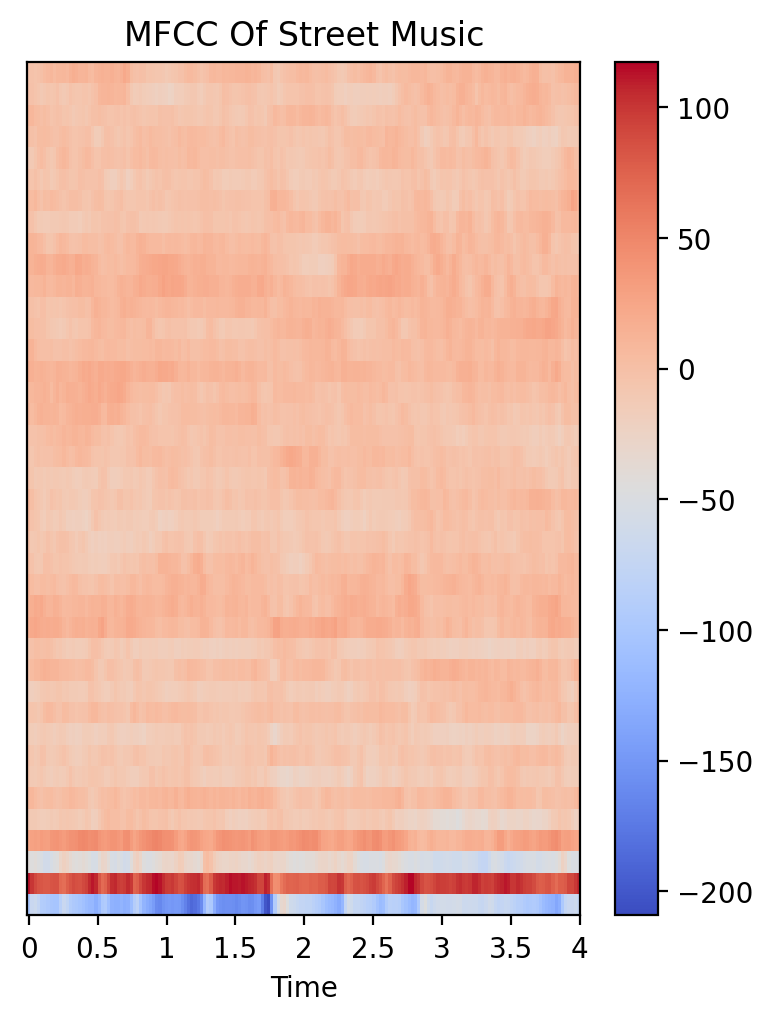

In [23]:
audio_path = audio_dataset_path + "fold1/108041-9-0-11.wav"
(xf, sr) = librosa.load(audio_path)
mfccs = librosa.feature.mfcc(y=xf, sr=sr, n_mfcc=40)
librosa.display.specshow(mfccs, x_axis="time")
plt.colorbar()
plt.tight_layout()
plt.title("MFCC Of Street Music")
plt.show


# **Feature Extraction and Database Building**

## Method

1. I have used Librosa to preprocess audio file.
2. To do so, I will go through each fold and extract the data from each file using librosa's mfcc function.
3. The extracted data is appended in a list and stored in a dataframe.

### The function bellow will extract mfcc feature

In [24]:
# list containing all the features
extracted = []

# for each row in the csv
for index_num, row in tqdm(meta_data.iterrows()):
    # get the file
    file_name = os.path.join(
        os.path.abspath(audio_dataset_path),
        "fold" + str(row["fold"]),
        str(row["slice_file_name"]),
    )
    # get file label
    final_class_labels = row["class"]
    # load the audio file - Changed res_type to avoid resampy dependency
    audio, sample_rate = librosa.load(file_name, res_type="soxr_hq")
    # extract the features
    feature = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=128)
    # feature scaling
    scaled_feature = np.mean(feature.T, axis=0)
    # store it in a list
    extracted.append([scaled_feature, final_class_labels])

8732it [01:17, 113.01it/s]


### Using a dataframe and pickle to save the extracted features array


In [ ]:
# create a new dataframe
extracted_df = pd.DataFrame(extracted, columns=["feature", "class"])
# Storing the dataframe to pickle for further processing
extracted_df.to_pickle("extracted_df.pkl")
extracted_df.head()


,feature,class
0,"[-211.93698, 62.58121, -122.813156, -60.745293...",Dog Bark
1,"[-417.0052, 99.336624, -42.995583, 51.073326, ...",Children Playing
2,"[-452.39316, 112.36253, -37.57807, 43.195866, ...",Children Playing
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",Children Playing
4,"[-439.63873, 103.86223, -42.658783, 50.690285,...",Children Playing


# **Data Preprocessing**


## Distribute the data to X and Y


In [26]:
final = pd.read_pickle("extracted_df.pkl")
X = np.array(final["feature"].tolist())
y = np.array(final["class"].tolist())


## Using LabelEncoder() to encode the string labels to an integer


In [27]:
# label encoding to get encoding
le = LabelEncoder()

# transform each category with it's respected label
Y = to_categorical(le.fit_transform(y))


## Split the data into train and test sets


In [28]:
# split the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# print the details
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ", X_test.shape[0])


Number of training samples =  6985
Number of testing samples =  1747


# **Model 1 - ANN**


## Building the model


In [29]:
# Construct model

num_labels = Y.shape[1]
ANN_Model = Sequential()
ANN_Model.add(Dense(1000, activation="relu", input_shape=(128,)))
ANN_Model.add(Dense(750, activation="relu"))
ANN_Model.add(Dense(500, activation="relu"))
ANN_Model.add(Dense(250, activation="relu"))
ANN_Model.add(Dense(100, activation="relu"))
ANN_Model.add(Dense(50, activation="relu"))
ANN_Model.add(Dense(num_labels, activation="softmax"))
ANN_Model.summary()


I0000 00:00:1762528329.854089    5171 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 43742 MB memory:  -> device: 0, name: NVIDIA L40S, pci bus id: 0000:34:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │       129,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 750)            │       750,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       375,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        25,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,411,160 (5.38 MB)

 Trainable params: 1,411,160 (5.38 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling the model


In [30]:
ANN_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)


## Fitting the model


In [31]:
num_epochs = 250
num_batch_size = 32

t0 = time.time()

ANN_Results = ANN_Model.fit(
    X_train,
    y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
)

ANN_Model.save("Model1.h5")
print("ANN Model Saved")
train_hist_m1 = pd.DataFrame(ANN_Results.history)
train_m1 = round(time.time() - t0, 3)


Epoch 1/250


2025-11-07 15:12:12.731084: I external/local_xla/xla/service/service.cc:163] XLA service 0x7fbdbc0120b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-07 15:12:12.731102: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA L40S, Compute Capability 8.9
2025-11-07 15:12:12.804617: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-07 15:12:13.081000: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
2025-11-07 15:12:13.146835: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-07 15:12:13.146898: I external/loca

120/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2442 - loss: 3.0762

I0000 00:00:1762528342.695191   34568 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3106 - loss: 2.5721

2025-11-07 15:12:27.632191: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-07 15:12:27.632258: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-07 15:12:27.632271: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-07 15:12:27.632280: I external/l

219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.4309 - loss: 1.8023 - val_accuracy: 0.6531 - val_loss: 1.1263
Epoch 2/250
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6656 - loss: 1.0069 - val_accuracy: 0.7144 - val_loss: 0.8620
Epoch 3/250
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7688 - loss: 0.6992 - val_accuracy: 0.8060 - val_loss: 0.6112
Epoch 4/250
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8339 - loss: 0.5026 - val_accuracy: 0.8397 - val_loss: 0.5586
Epoch 5/250
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8541 - loss: 0.4310 - val_accuracy: 0.8523 - val_loss: 0.4691
Epoch 6/250
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8836 - loss: 0.3485 - val_accuracy: 0.8781 - val_loss: 0.4079
Epoch 7/250
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9037 - loss: 0.2855 - val_accuracy: 0.8781 - val_loss: 0.3884
Epoch 8/250
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9203 - loss: 0.2337 - val_accuracy: 0.86

ANN Model Saved


## Results


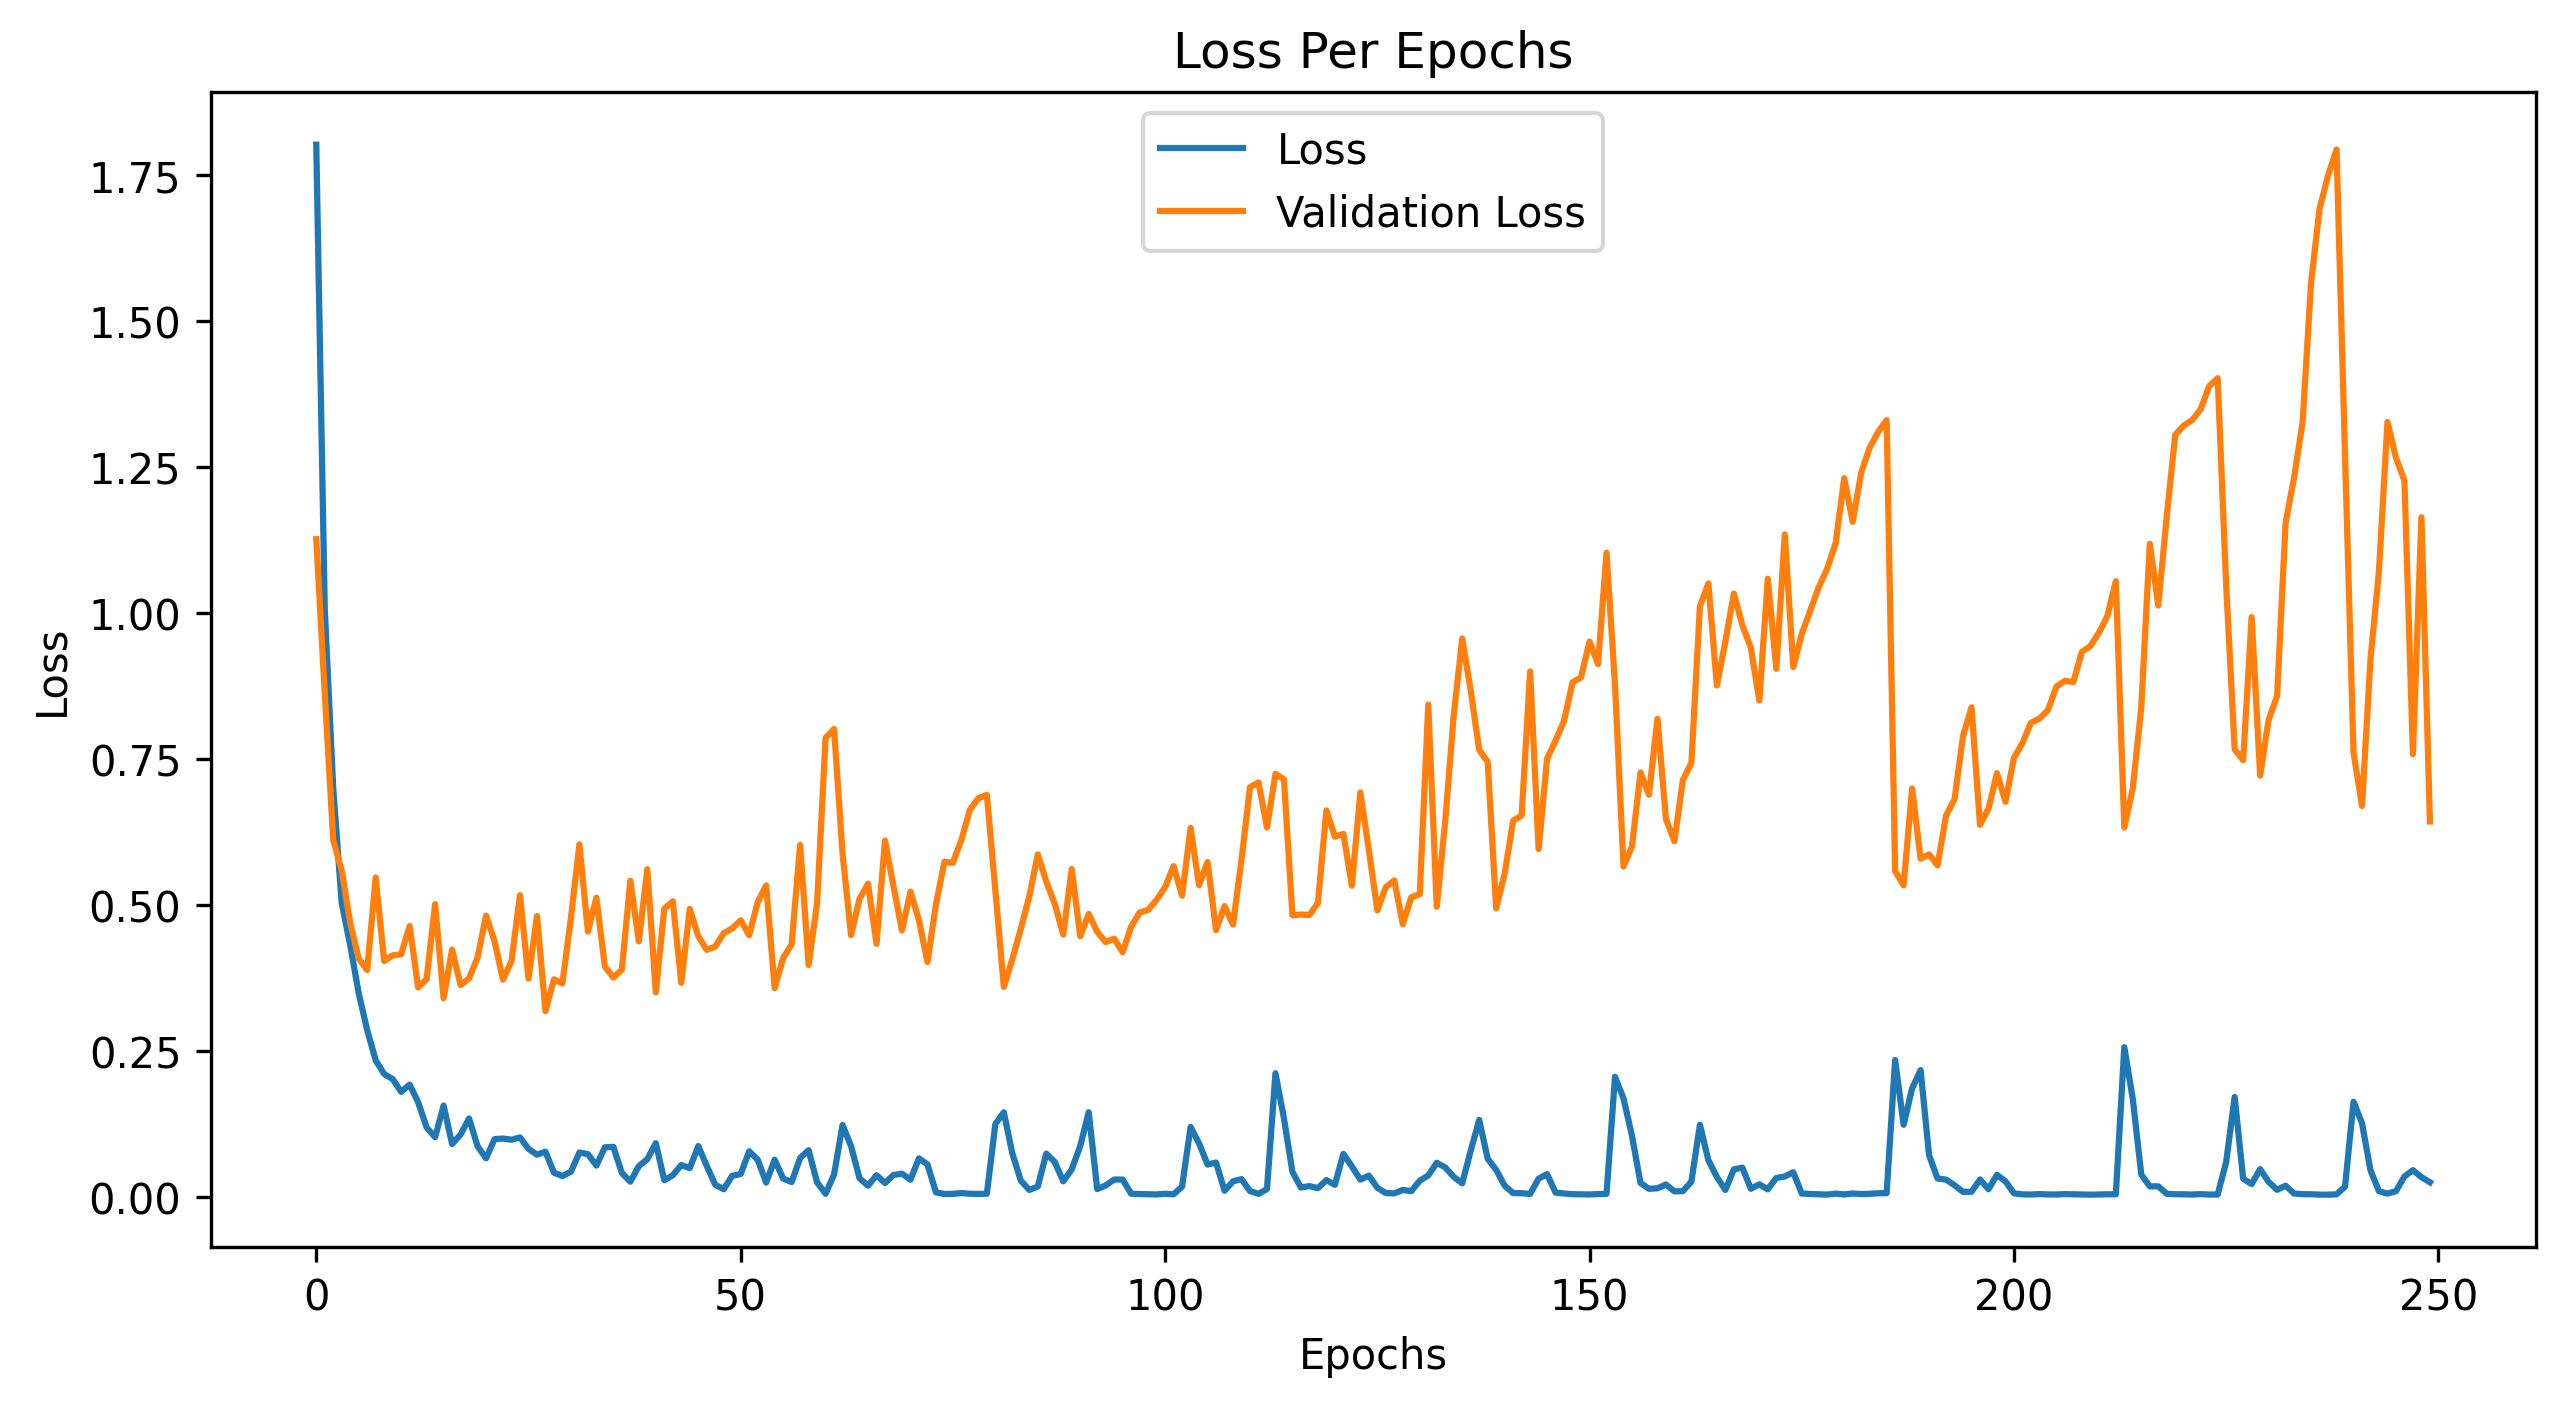

In [32]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m1[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


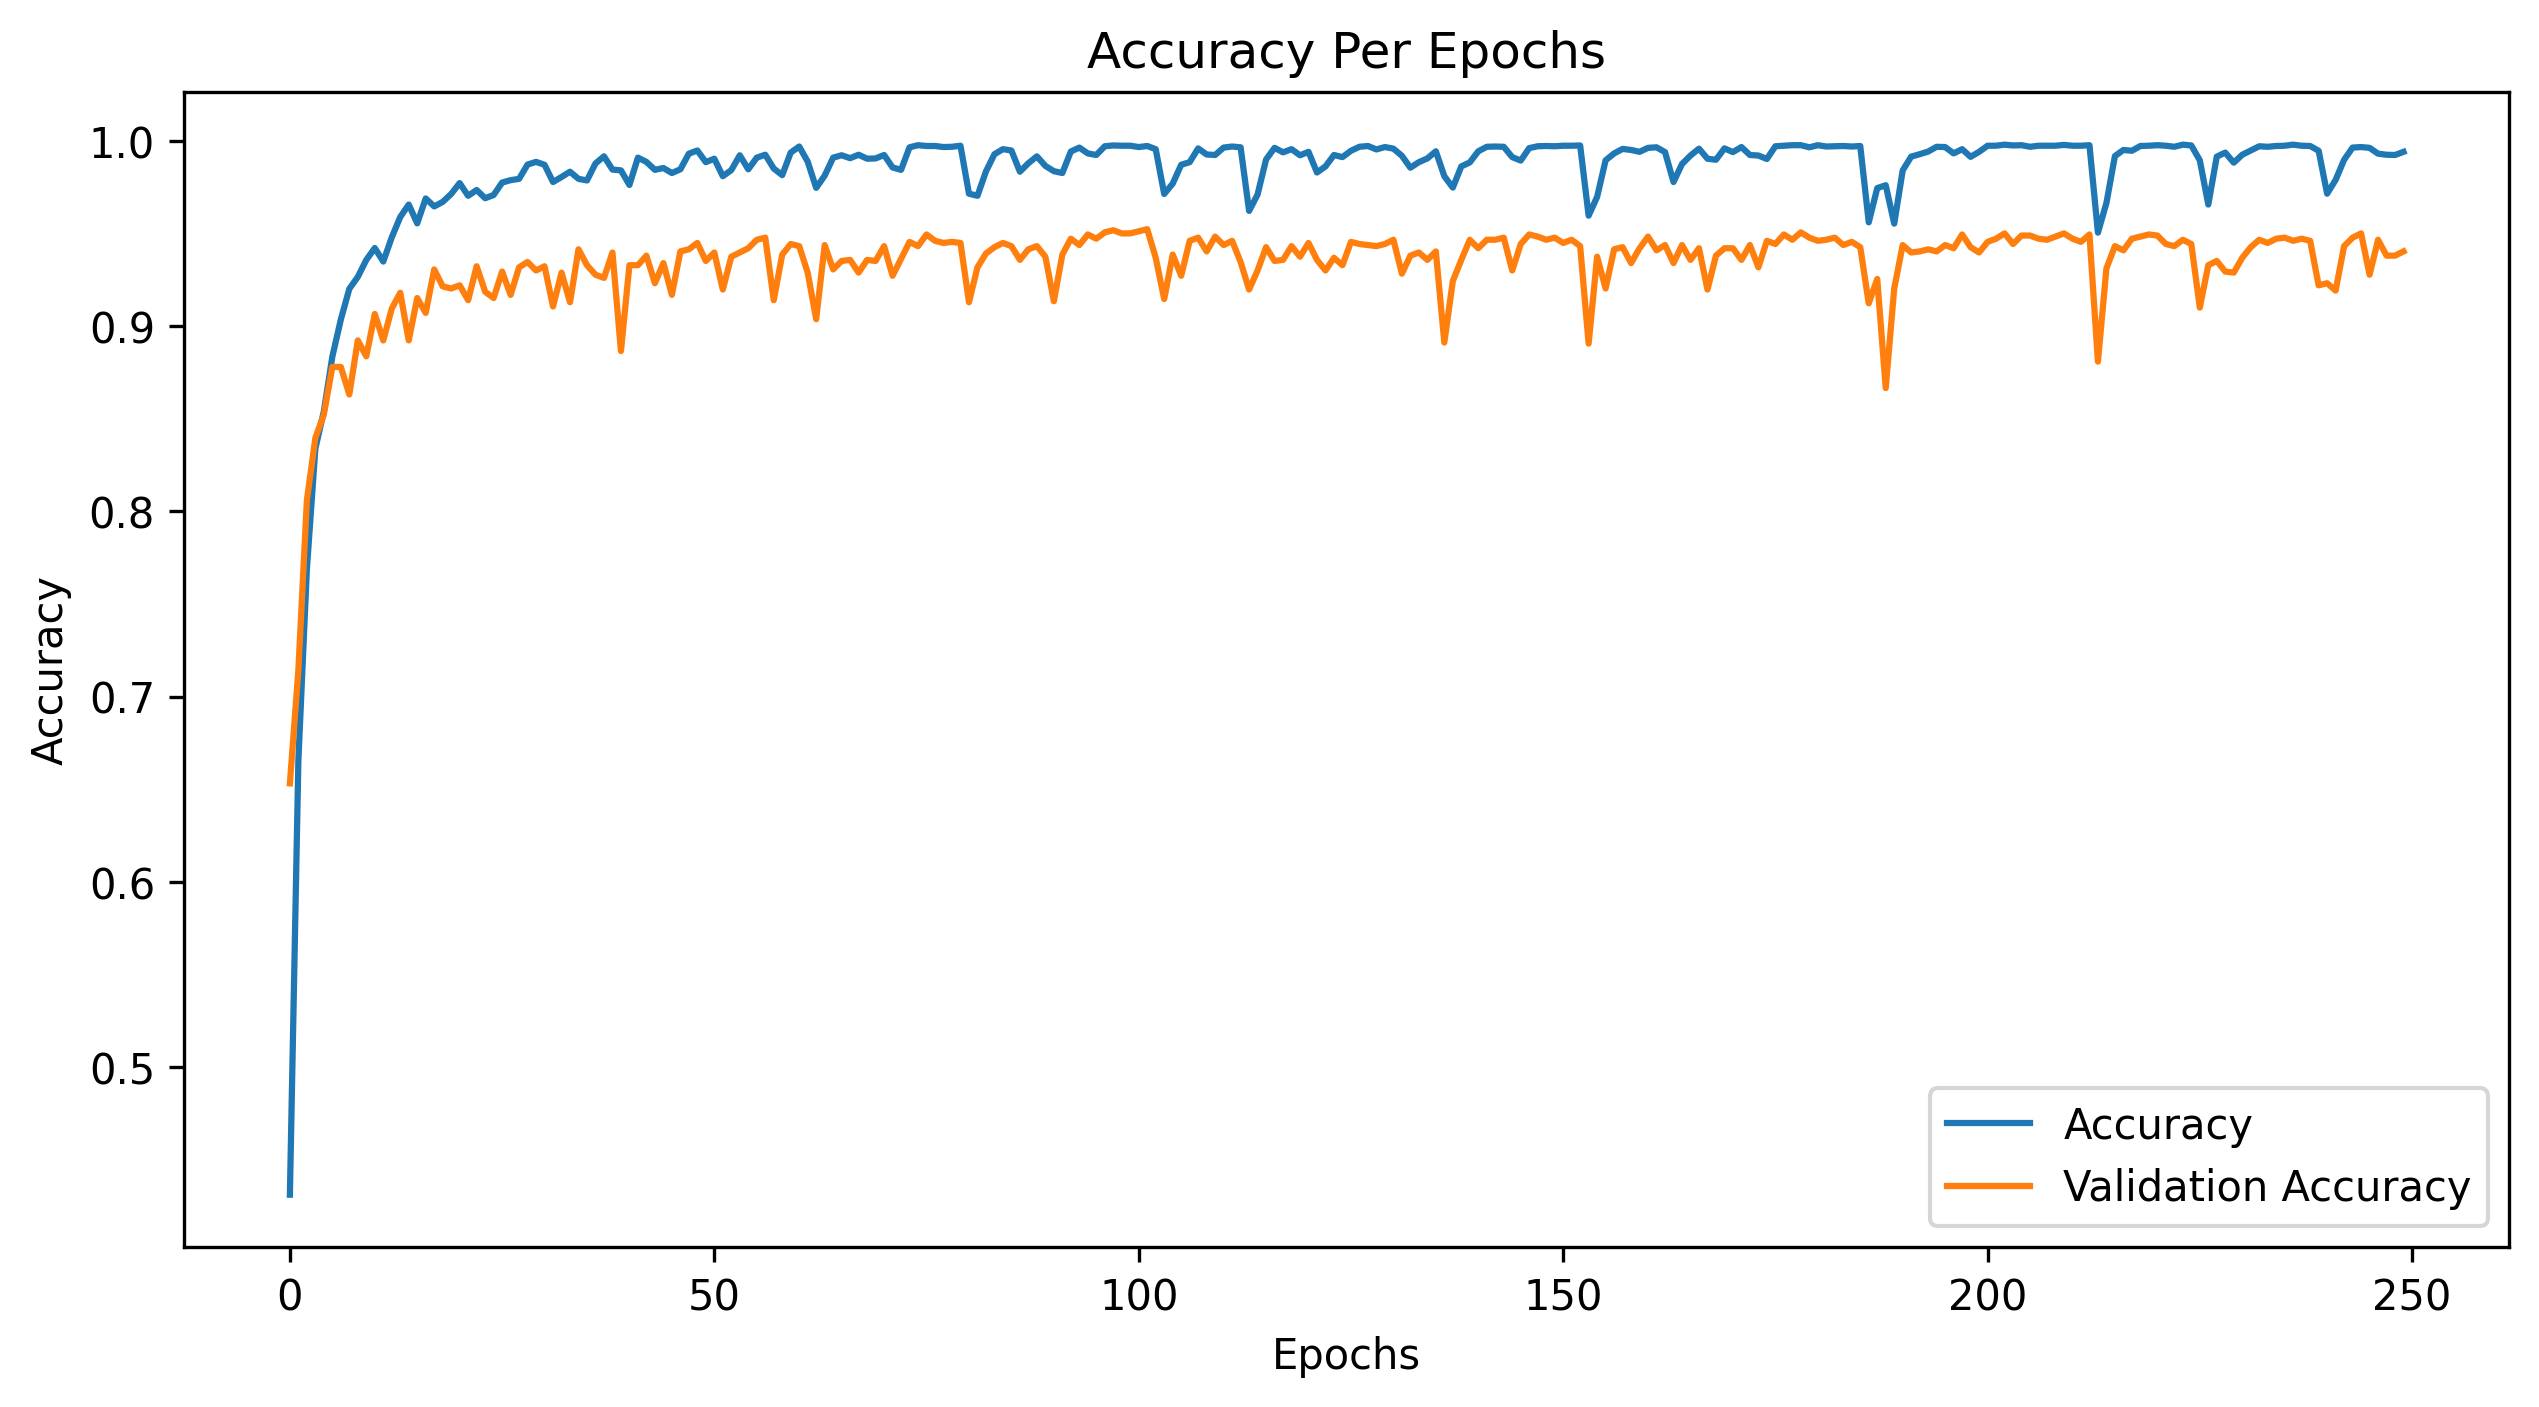

In [33]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m1[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


In [34]:
acc_m1 = ANN_Model.evaluate(X_test, y_test, verbose=0)
t0 = time.time()
y_pred_m1 = ANN_Model.predict(X_test, verbose=0)
pred_m1 = round(time.time() - t0, 3)
log_entry = pd.DataFrame(
    [["ANN", acc_m1[1] * 100, train_m1, pred_m1]], columns=log_cols
)
log = pd.concat([log, log_entry], ignore_index=True)

## ANN Prediction Function


In [35]:
# function to predict the feature
def ANN_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # get the id of label using argmax
    predicted_vector = np.argmax(ANN_Model.predict(prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("ANN has predicted the class as  --> ", predicted_class[0])


## Testing the Model on Sample audio


In [36]:
# File name
# file_name = audio_dataset_path + "fold8/103076-3-0-0.wav"
# # get the output
# ANN_Prediction(file_name)
# # play the file
# ipd.Audio(file_name)


# **Model 2 - CNN1D**


## Preprocessing


In [37]:
xTrainval, xTest, yTrainval, yTest = train_test_split(
    X, Y, test_size=0.1, stratify=y, random_state=387
)
xTrain, xvalid, yTrain, yvalid = train_test_split(
    xTrainval, yTrainval, test_size=0.2, stratify=yTrainval, random_state=387
)
print("\nNumber of samples for Train set :", xTrain.shape[0])
print("Number of samples for Validation set :", xvalid.shape[0])
print("Number of samples for Test set :", xTest.shape[0])

xTrain = np.expand_dims(xTrain, axis=2)
xvalid = np.expand_dims(xvalid, axis=2)

print("Shape of X Train", xTrain.shape)
print("Shape of X Test", xTest.shape)



Number of samples for Train set : 6286
Number of samples for Validation set : 1572
Number of samples for Test set : 874
Shape of X Train (6286, 128, 1)
Shape of X Test (874, 128)


## Building the CNN1D Model


In [38]:
CNN1D_Model = Sequential()
CNN1D_Model.add(
    Conv1D(
        256,
        5,
        strides=1,
        padding="same",
        activation="relu",
        input_shape=(xTrain.shape[1], 1),
    )
)
CNN1D_Model.add(BatchNormalization())
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Conv1D(256, 5, strides=1, padding="same", activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Conv1D(128, 5, strides=1, padding="same", activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Conv1D(64, 5, strides=1, padding="same", activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(MaxPooling1D(3, strides=2, padding="same"))
CNN1D_Model.add(Flatten())
CNN1D_Model.add(Dense(units=1024, activation="relu"))
CNN1D_Model.add(Dropout(0.3))
CNN1D_Model.add(Dense(units=10, activation="softmax"))
CNN1D_Model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 128, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 64, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 64, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 32, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 32, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 16, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 16, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 8, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,071,050 (4.09 MB)

 Trainable params: 1,070,538 (4.08 MB)

 Non-trainable params: 512 (2.00 KB)

## Compiling the Model


In [39]:
CNN1D_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)


## Fitting the Model


In [40]:
t0 = time.time()

CNN1D_Results = CNN1D_Model.fit(
    xTrain, yTrain, batch_size=64, epochs=250, validation_data=(xvalid, yvalid)
)

CNN1D_Model.save("Model2.h5")
print("CNN1D Model Saved")
train_hist_m2 = pd.DataFrame(CNN1D_Results.history)
train_m2 = round(time.time() - t0, 3)


Epoch 1/250


2025-11-07 15:14:14.090147: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-07 15:14:15.076273: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2692', 44 bytes spill stores, 44 bytes spill loads



99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2529 - loss: 2.2561

2025-11-07 15:14:24.247378: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_203', 4 bytes spill stores, 4 bytes spill loads

2025-11-07 15:14:25.695519: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_203', 12 bytes spill stores, 12 bytes spill loads

2025-11-07 15:14:25.817157: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_203', 148 bytes spill stores, 148 bytes spill loads



99/99 ━━━━━━━━━━━━━━━━━━━━ 15s 71ms/step - accuracy: 0.3360 - loss: 1.8839 - val_accuracy: 0.5025 - val_loss: 1.6953
Epoch 2/250
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5310 - loss: 1.3305 - val_accuracy: 0.6571 - val_loss: 1.3210
Epoch 3/250
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6067 - loss: 1.1287 - val_accuracy: 0.7080 - val_loss: 1.0461
Epoch 4/250
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6675 - loss: 0.9606 - val_accuracy: 0.7417 - val_loss: 0.9686
Epoch 5/250
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7124 - loss: 0.8488 - val_accuracy: 0.7684 - val_loss: 0.8794
Epoch 6/250
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7386 - loss: 0.7762 - val_accuracy: 0.8098 - val_loss: 0.8169
Epoch 7/250
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7587 - loss: 0.7119 - val_accuracy: 0.8009 - val_loss: 0.7280
Epoch 8/250
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7848 - loss: 0.6316 - val_accuracy: 0.8257 - val_loss: 0

CNN1D Model Saved


## Results


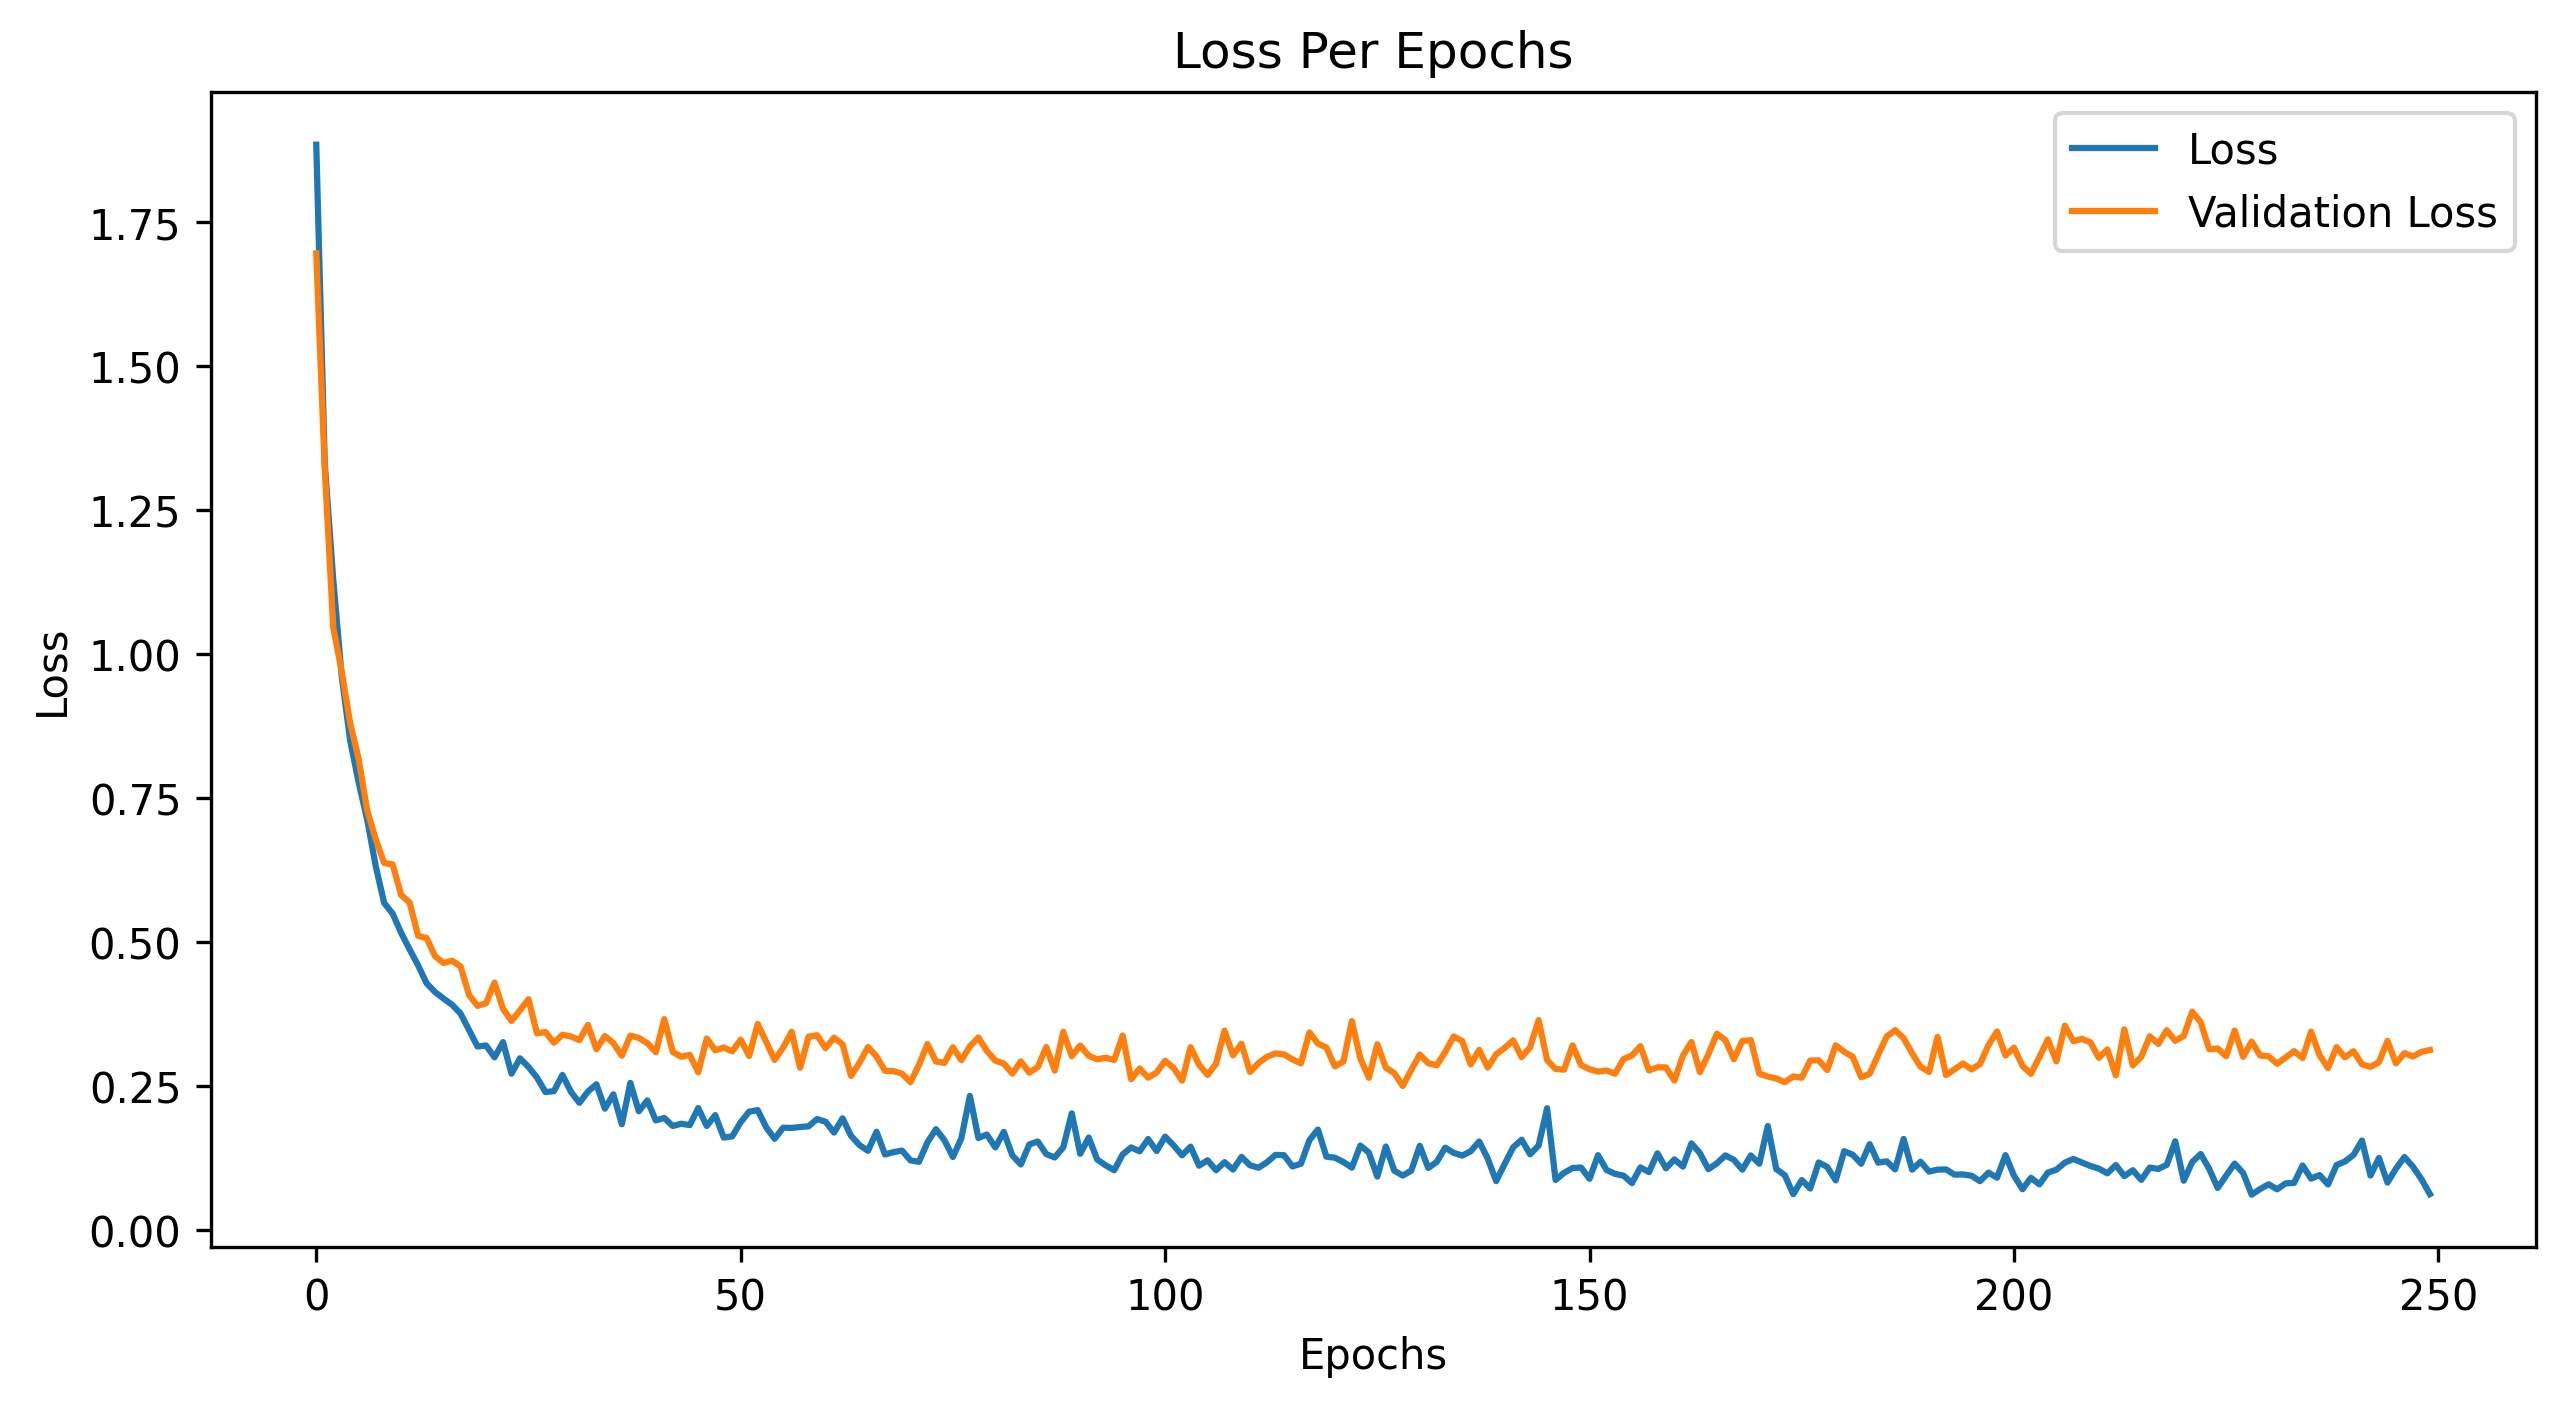

In [41]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m2[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


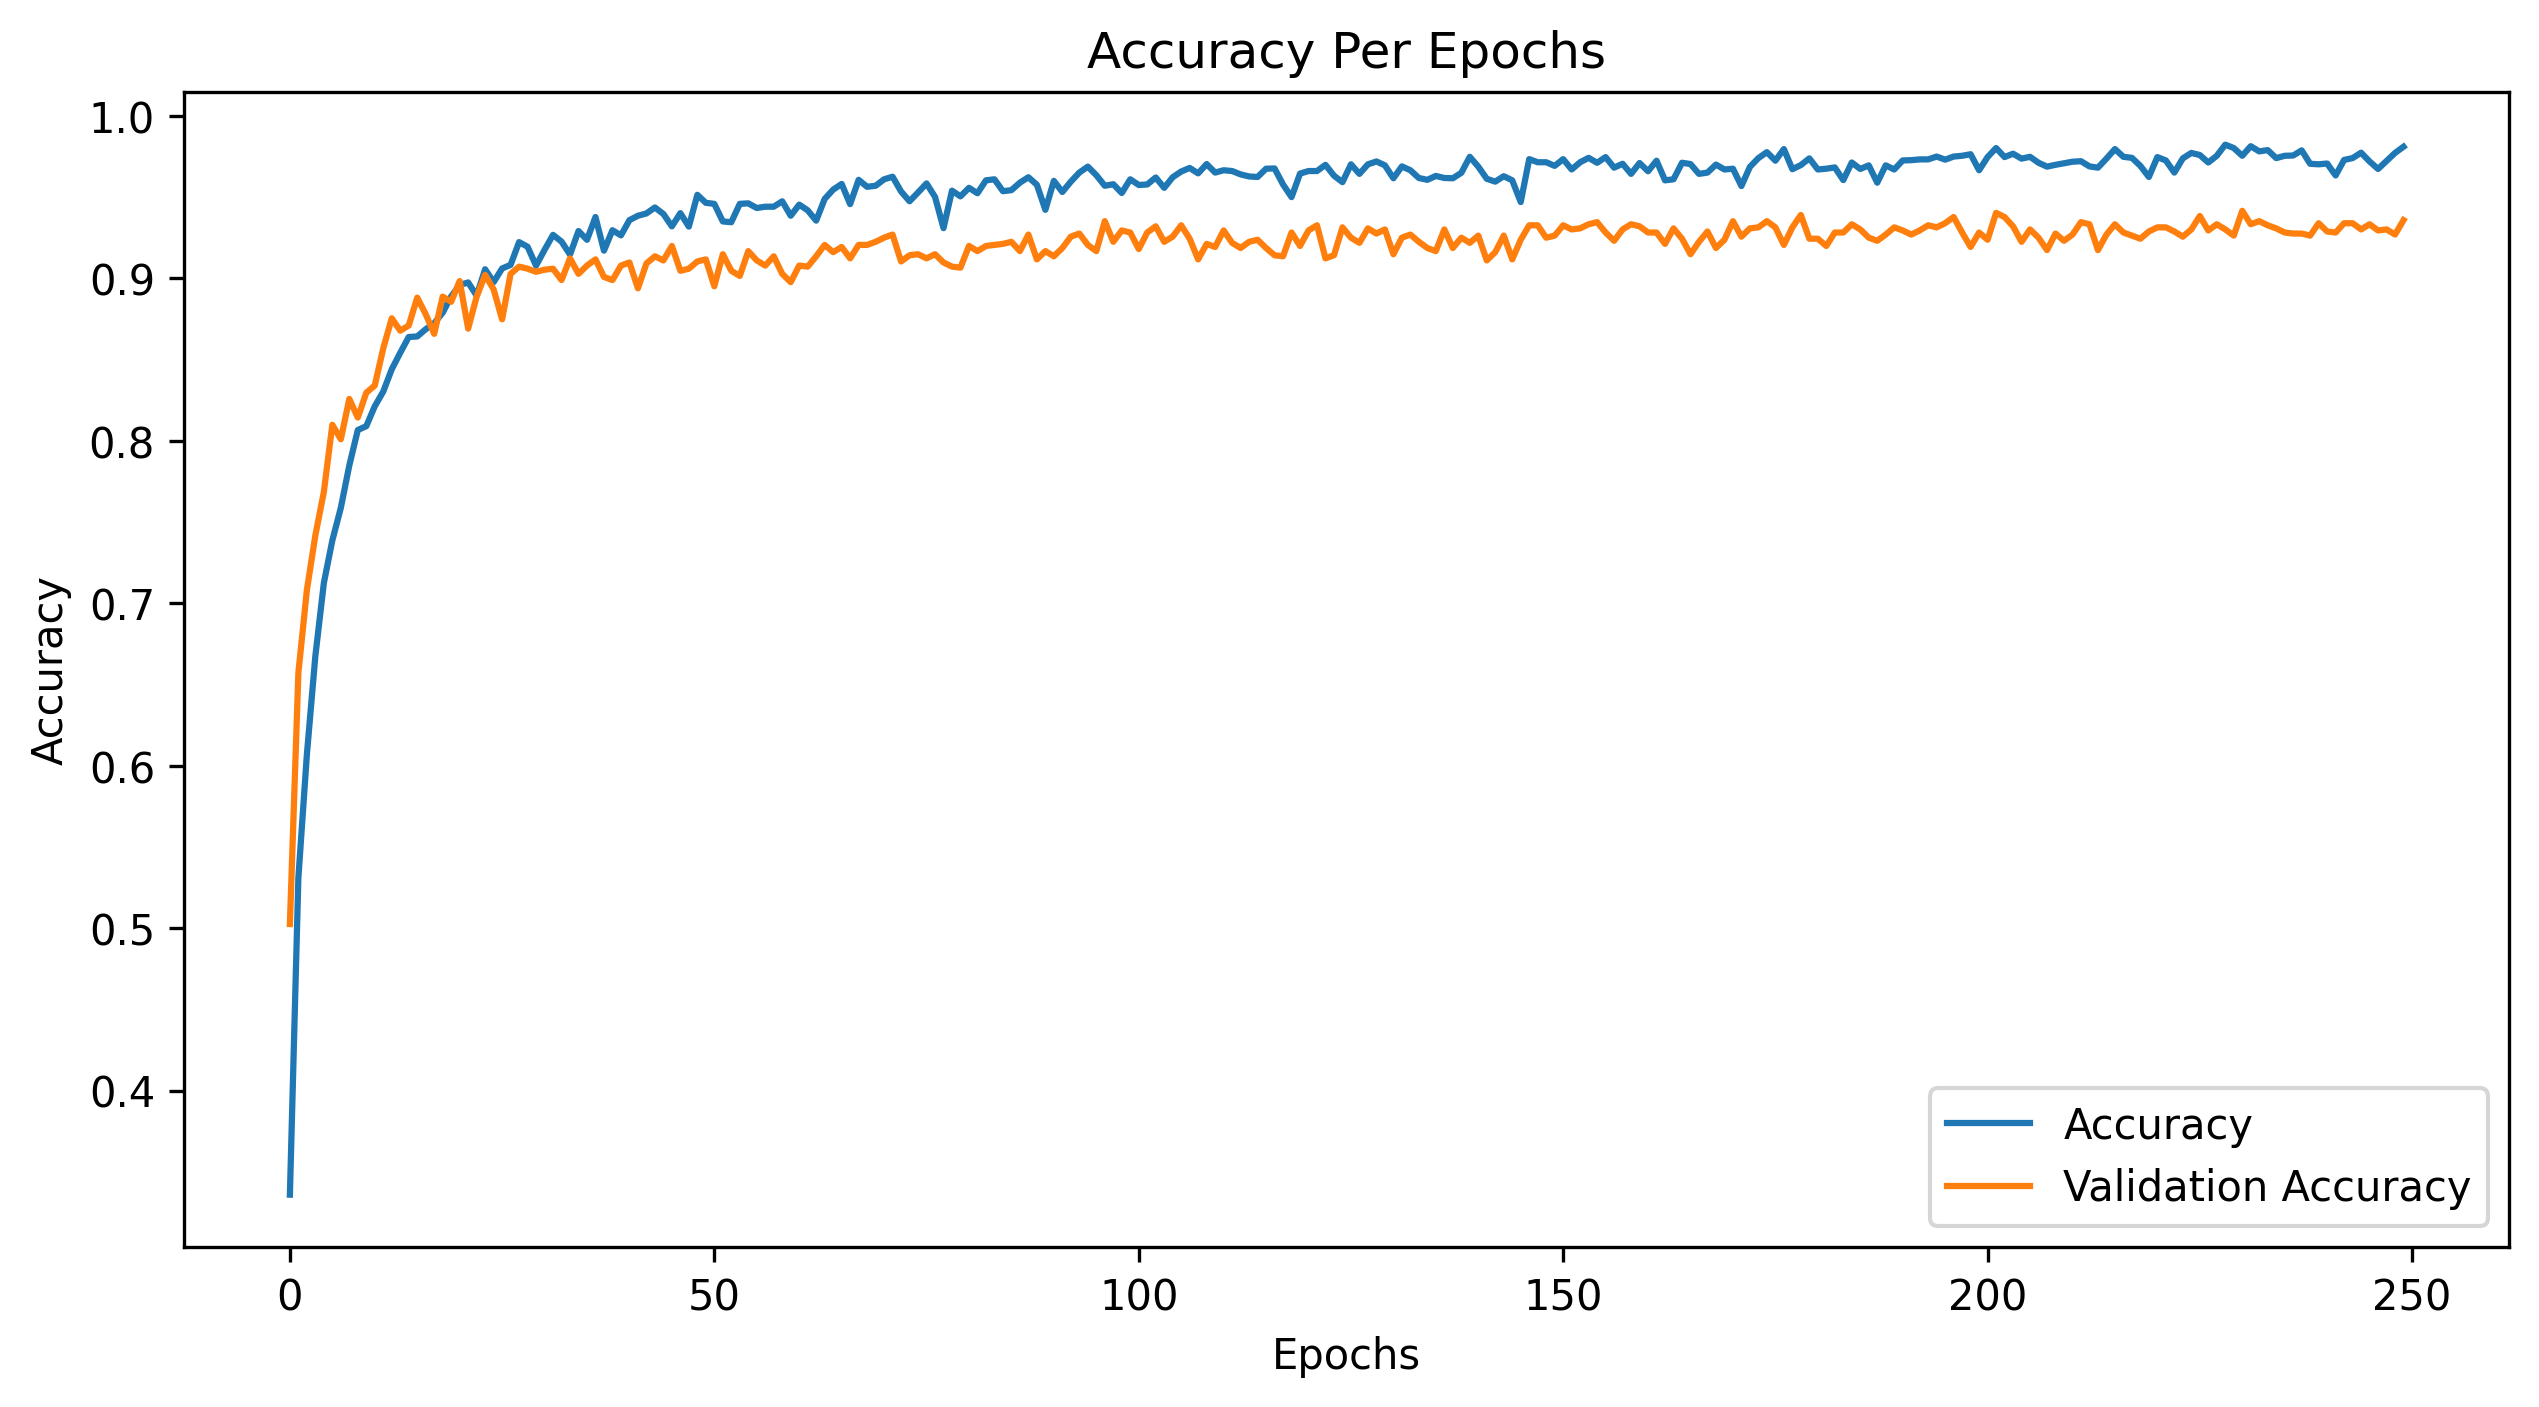

In [42]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m2[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


In [43]:
acc_m2 = CNN1D_Model.evaluate(xvalid, yvalid, verbose=0)
t0 = time.time()
y_pred_m2 = CNN1D_Model.predict(xvalid, verbose=0)
pred_m2 = round(time.time() - t0, 3)
log_entry = pd.DataFrame(
    [["CNN1D", acc_m2[1] * 100, train_m2, pred_m2]], columns=log_cols
)
log = pd.concat([log, log_entry], ignore_index=True)

2025-11-07 15:15:33.216221: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_203', 16 bytes spill stores, 16 bytes spill loads

2025-11-07 15:15:33.265526: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_203', 4 bytes spill stores, 4 bytes spill loads

2025-11-07 15:15:34.381467: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_203', 8 bytes spill stores, 8 bytes spill loads



## CNN1D Prediction Function


In [44]:
# function to predict the feature
def CNN1D_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # expand dims
    final_prediction_feature = np.expand_dims(prediction_feature, axis=2)
    # get the id of label using argmax
    predicted_vector = np.argmax(CNN1D_Model.predict(final_prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("CNN1D has predicted the class as  --> ", predicted_class[0])


## Testing the Model on Sample audio


In [45]:
# # File name
# file_name = audio_dataset_path + "fold8/103076-3-0-0.wav"
# # get the output
# CNN1D_Prediction(file_name)
# # play the file
# ipd.Audio(file_name)


# **Model 3 - CNN2D**


## Preprocessing


In [46]:
xtrain = xTrain.reshape(xTrain.shape[0], 16, 8, 1)
xtest = xTest.reshape(xTest.shape[0], 16, 8, 1)

print("The Shape of X Train", xtrain.shape)
print("The Shape of Y Train", yTrain.shape)
print("The Shape of X Test", xtest.shape)
print("The Shape of Y Test", yTest.shape)


The Shape of X Train (6286, 16, 8, 1)
The Shape of Y Train (6286, 10)
The Shape of X Test (874, 16, 8, 1)
The Shape of Y Test (874, 10)


## Building the CNN2D Model


In [47]:
CNN2D_Model = Sequential()
CNN2D_Model.add(
    Conv2D(64, (3, 3), padding="same", activation="tanh", input_shape=(16, 8, 1))
)
CNN2D_Model.add(MaxPool2D(pool_size=(2, 2)))
CNN2D_Model.add(Conv2D(128, (3, 3), padding="same", activation="tanh"))
CNN2D_Model.add(MaxPool2D(pool_size=(2, 2)))
CNN2D_Model.add(Dropout(0.1))
CNN2D_Model.add(Flatten())
CNN2D_Model.add(Dense(1024, activation="tanh"))
CNN2D_Model.add(Dense(10, activation="softmax"))
CNN2D_Model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 8, 64)      │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 8, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,134,346 (4.33 MB)

 Trainable params: 1,134,346 (4.33 MB)

 Non-trainable params: 0 (0.00 B)

## Compiling the Model


In [48]:
CNN2D_Model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
)


## Fitting the Model


In [49]:
t0 = time.time()

CNN2D_Results = CNN2D_Model.fit(
    xtrain, yTrain, epochs=250, batch_size=50, validation_data=(xtest, yTest)
)

CNN2D_Model.save("Model3.h5")
print("CNN2D Model Saved")
train_hist_m3 = pd.DataFrame(CNN2D_Results.history)
train_m3 = round(time.time() - t0, 3)


Epoch 1/250


2025-11-07 15:15:37.568873: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-07 15:15:38.563808: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_870', 120 bytes spill stores, 120 bytes spill loads

2025-11-07 15:15:38.567765: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_870', 520 bytes spill stores, 520 bytes spill loads

2025-11-07 15:15:38.669760: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_628', 556 

114/126 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4330 - loss: 1.7127

2025-11-07 15:15:40.449641: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-07 15:15:41.431739: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_870', 520 bytes spill stores, 520 bytes spill loads

2025-11-07 15:15:41.608204: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_870', 144 bytes spill stores, 144 bytes spill loads

2025-11-07 15:15:41.631969: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_628', 556 

126/126 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.5975 - loss: 1.2023 - val_accuracy: 0.7323 - val_loss: 0.7388
Epoch 2/250
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8004 - loss: 0.6034 - val_accuracy: 0.8055 - val_loss: 0.5505
Epoch 3/250
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.4127 - val_accuracy: 0.8432 - val_loss: 0.4800
Epoch 4/250
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8947 - loss: 0.3123 - val_accuracy: 0.8673 - val_loss: 0.4577
Epoch 5/250
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9203 - loss: 0.2430 - val_accuracy: 0.8398 - val_loss: 0.5114
Epoch 6/250
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9179 - loss: 0.2266 - val_accuracy: 0.8684 - val_loss: 0.4547
Epoch 7/250
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9423 - loss: 0.1741 - val_accuracy: 0.8661 - val_loss: 0.4644
Epoch 8/250
126/126 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9545 - loss: 0.1337 - val_accuracy: 0.878

CNN2D Model Saved


## Results


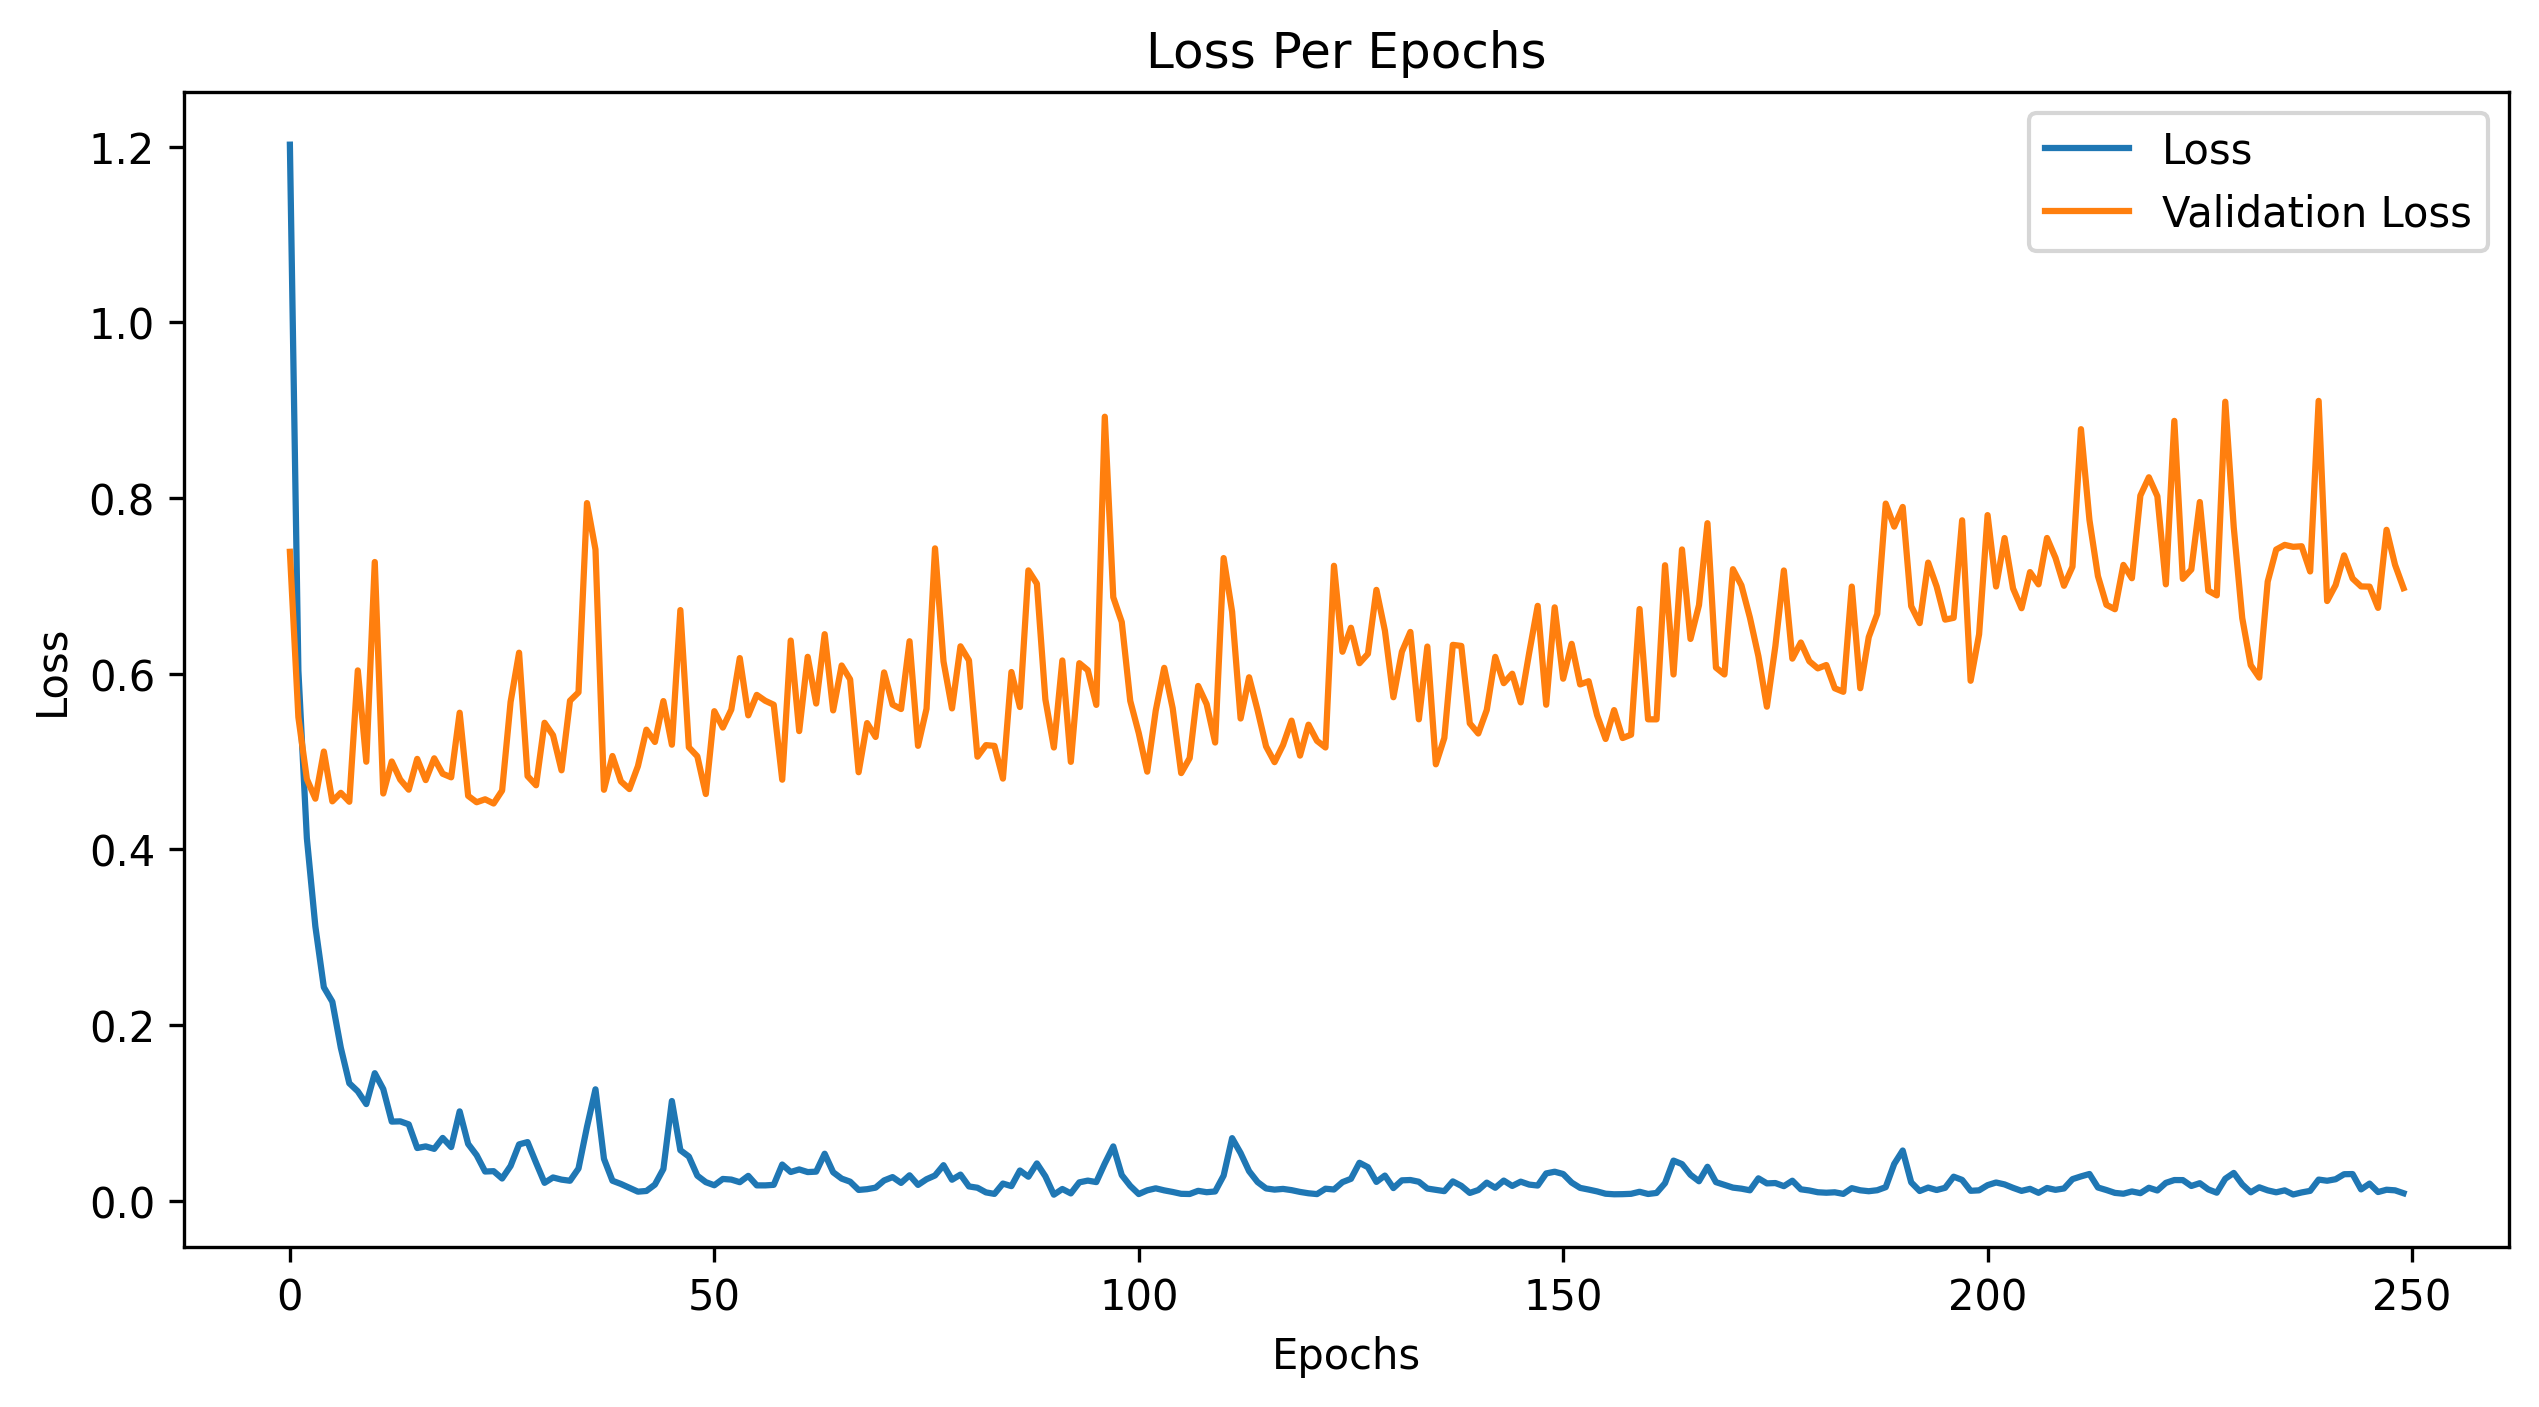

In [50]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m3[["loss", "val_loss"]])
plt.legend(["Loss", "Validation Loss"])
plt.title("Loss Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


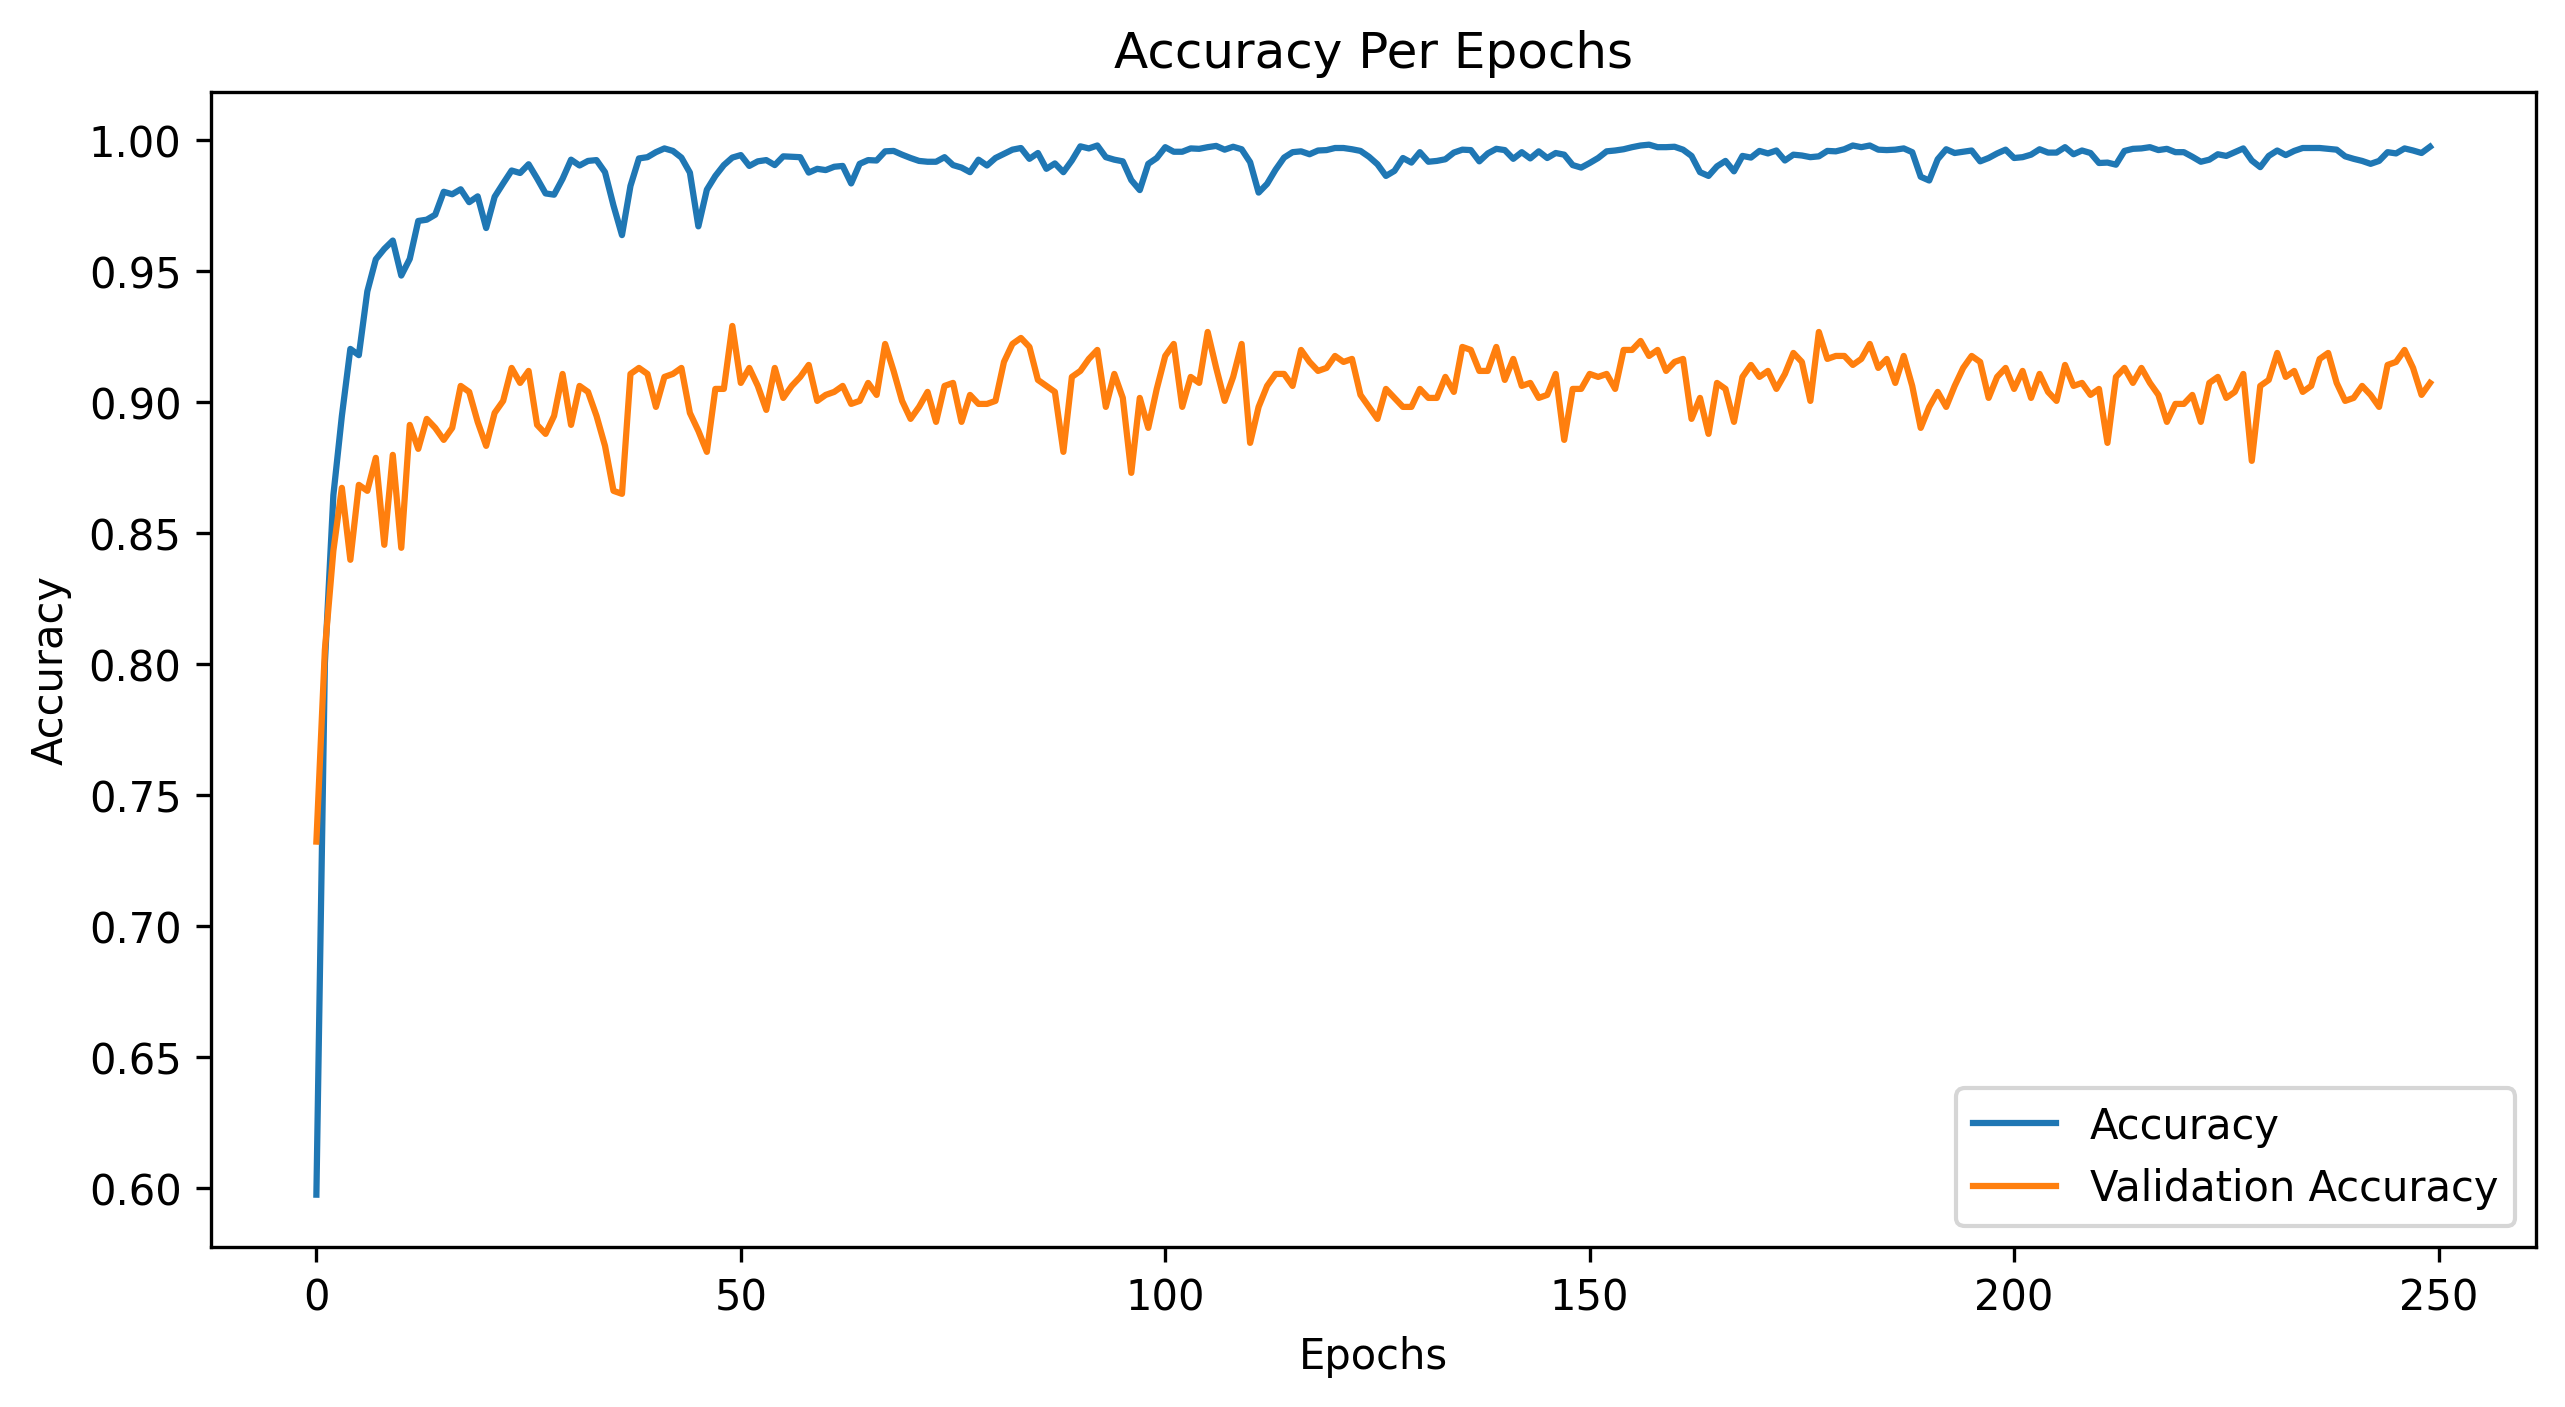

In [51]:
plt.figure(figsize=(10, 5), dpi=300)
plt.plot(train_hist_m3[["accuracy", "val_accuracy"]])
plt.legend(["Accuracy", "Validation Accuracy"])
plt.title("Accuracy Per Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()


In [52]:
acc_m3 = CNN2D_Model.evaluate(xtest, yTest, verbose=0)
t0 = time.time()
y_pred_m3 = CNN2D_Model.predict(xtest, verbose=0)
pred_m3 = round(time.time() - t0, 3)
log_entry = pd.DataFrame(
    [["CNN2D", acc_m3[1] * 100, train_m3, pred_m3]], columns=log_cols
)
log = pd.concat([log, log_entry], ignore_index=True)


## CNN2D Prediction Function


In [53]:
# function to predict the feature
def CNN2D_Prediction(file_name):
    # load the audio file
    audio_data, sample_rate = librosa.load(file_name, res_type="kaiser_fast")
    # get the feature
    feature = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=128)
    # scale the features
    feature_scaled = np.mean(feature.T, axis=0)
    # array of features
    prediction_feature = np.array([feature_scaled])
    # reshaping the features
    final_prediction_feature = prediction_feature.reshape(
        prediction_feature.shape[0], 16, 8, 1
    )
    # get the id of label using argmax
    predicted_vector = np.argmax(CNN2D_Model.predict(final_prediction_feature), axis=-1)
    # get the class label from class id
    predicted_class = le.inverse_transform(predicted_vector)
    # display the result
    print("CNN2D has predicted the class as  --> ", predicted_class[0])


## Testing the Model on Sample audio


In [54]:
# # File name
# file_name = audio_dataset_path + "fold8/103076-3-0-0.wav"
# # get the output
# CNN2D_Prediction(file_name)
# # play the file
# ipd.Audio(file_name)


# **Comparative Analysis**


In [55]:
plt.rcParams["figure.figsize"] = (17, 2)
plt.rcParams["figure.dpi"] = 550


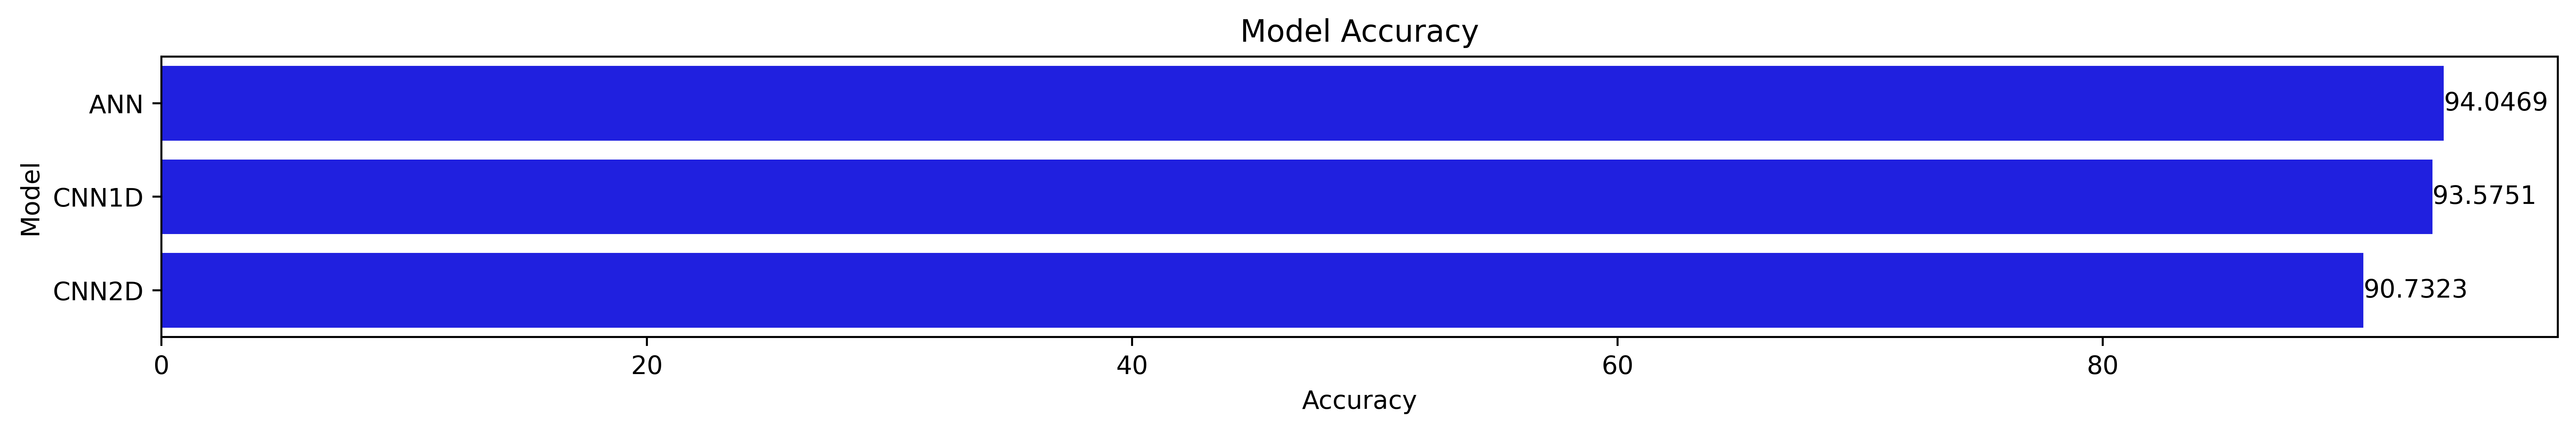

In [56]:
ax = sns.barplot(x="accuracy", y="model", data=log, color="b")
ax.bar_label(ax.containers[0])
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.title("Model Accuracy")
plt.show()


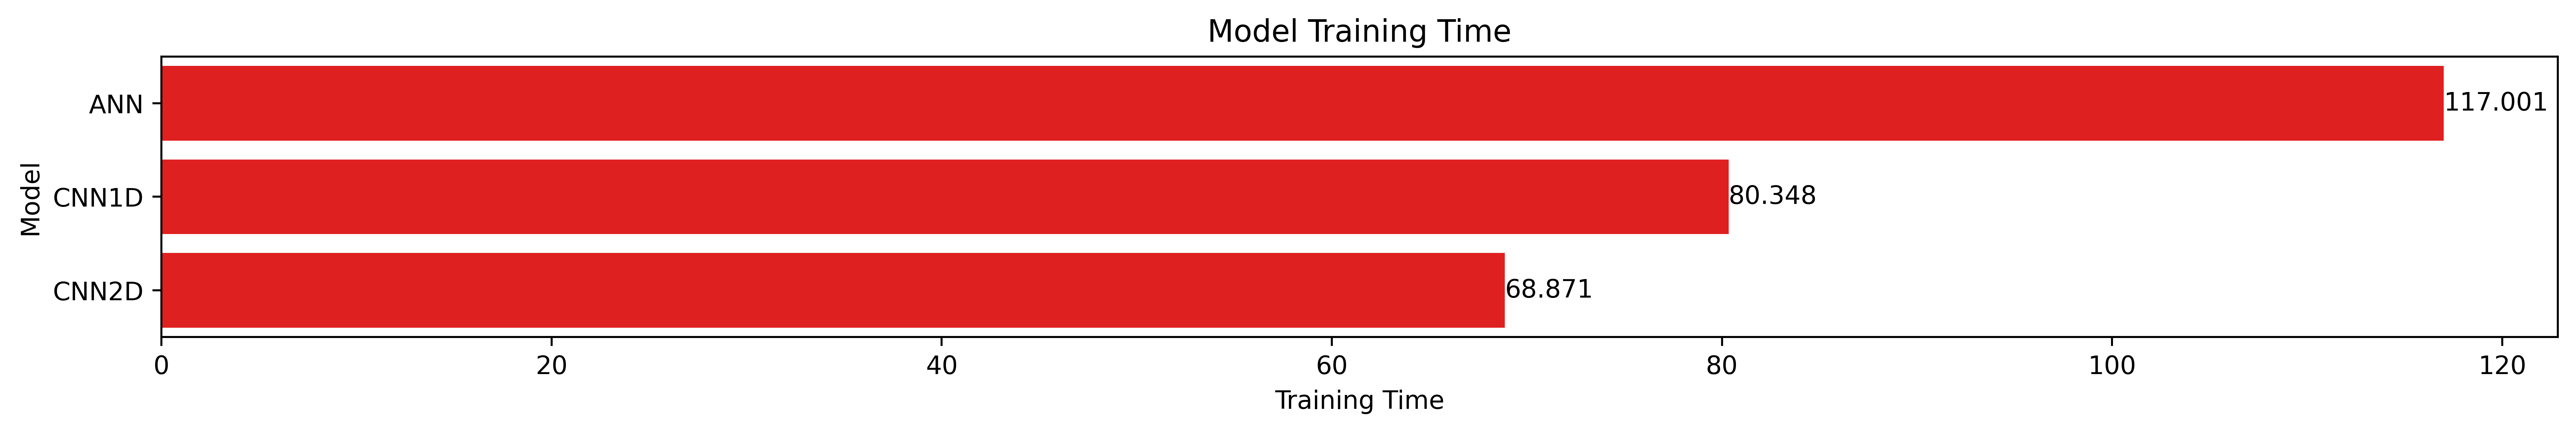

In [57]:
ax = sns.barplot(x="train_time", y="model", data=log, color="r")
ax.bar_label(ax.containers[0])
plt.xlabel("Training Time")
plt.ylabel("Model")
plt.title("Model Training Time")
plt.show()


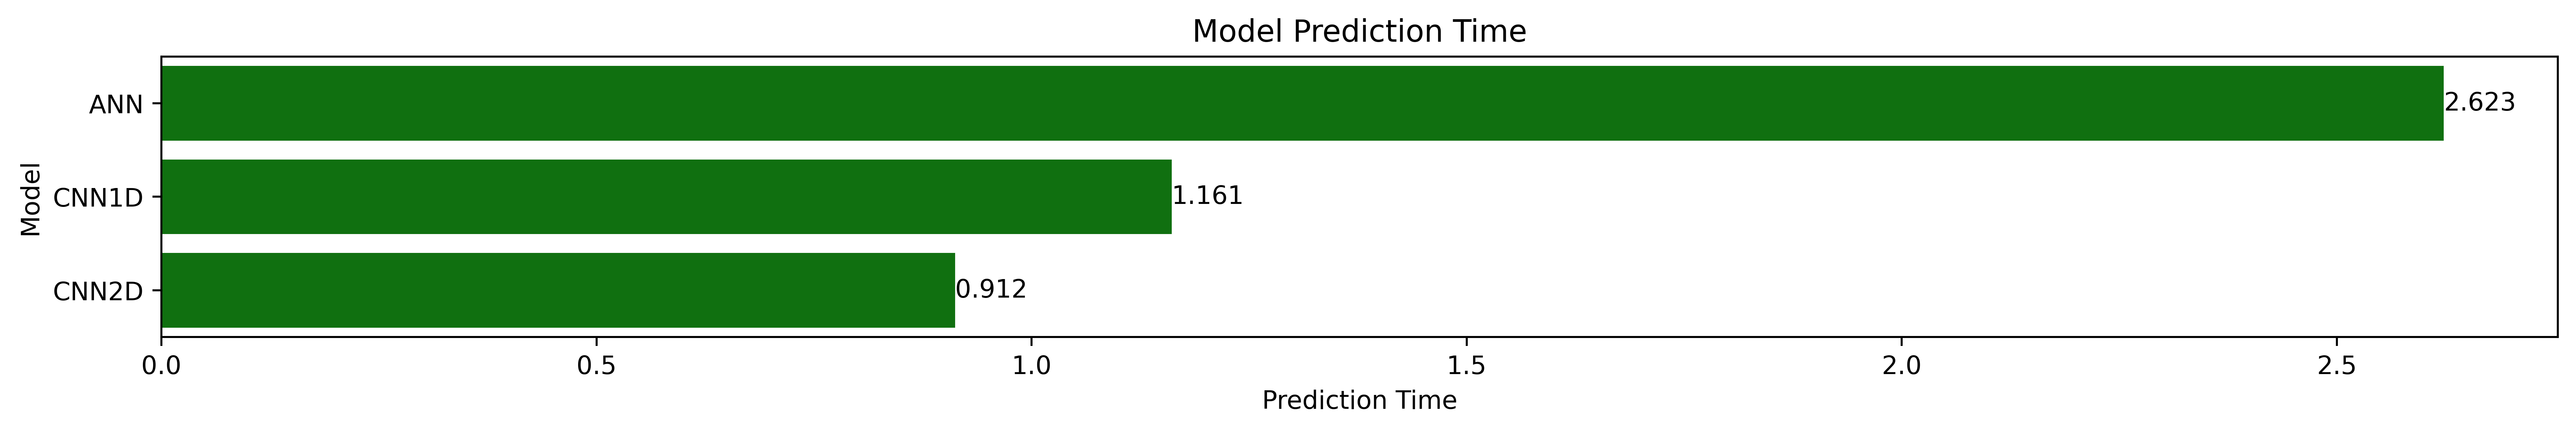

In [58]:
ax = sns.barplot(x="pred_time", y="model", data=log, color="g")
ax.bar_label(ax.containers[0])
plt.xlabel("Prediction Time")
plt.ylabel("Model")
plt.title("Model Prediction Time")
plt.show()
